# Lab | Cleaning numerical data

#### Instructions
1. Import the necessary libraries.
2. Load the customer_value_analysis.csv into the variable customer_df.
3. First look at its main features (head, shape, info).
4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).
5. Change the type of effective_to_date column to DateTime format.
6. Check NaN values per column.
7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another  with categorical columns of the input dataframe.
8. Drop any ID column.
9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?
10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.
11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).
12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)
13. According to the previous histogram plots, do you think that you will have to apply any transformation?
14. Look for outliers in the continuous variables that you have found. Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

#### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import functions

#### 2. Load the customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv('files_for_lab/customer_value_analysis.csv')

#### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### 4. Rename the columns so they follow the PE8 (snake case: lowecase_with_underscores).

In [6]:
customer_df=functions.cleaning_column_names(customer_df)
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


#### 5. Change the type of effective_to_date column to DateTime format.

In [7]:
customer_df['effective_to_date']=pd.to_datetime(customer_df['effective_to_date'])
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

#### 6. Check NaN values per column.

In [8]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

#### 7. Define a function that given an input dataframe, returns two dataframes: one with numerical columns and another with categorical columns of the input dataframe.

In [9]:
def separate_dataframe_types (dataframe: pd.DataFrame) ->pd.DataFrame:
    '''
    This function is given an input dataframe and returns two dataframes:
    one with numerical columns and another with categorical columns of the input dataframe.
    '''
    import pandas as pd
    import numpy as np
    dataframe_numerical = dataframe.select_dtypes(np.number)
    dataframe_categorical = dataframe.select_dtypes(object)
    return dataframe_numerical, dataframe_categorical

customer_df_num, customer_df_cat = separate_dataframe_types(customer_df)

In [10]:
customer_df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [11]:
customer_df_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


#### 8. Drop any ID column.

In [12]:
customer_df_cat.drop('customer', axis=1, inplace=True)
customer_df_cat

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


#### 9. Get the correlation matrix for the numerical variables. What is the pair of numerical variables that have the highest correlation? It makes sense, why?

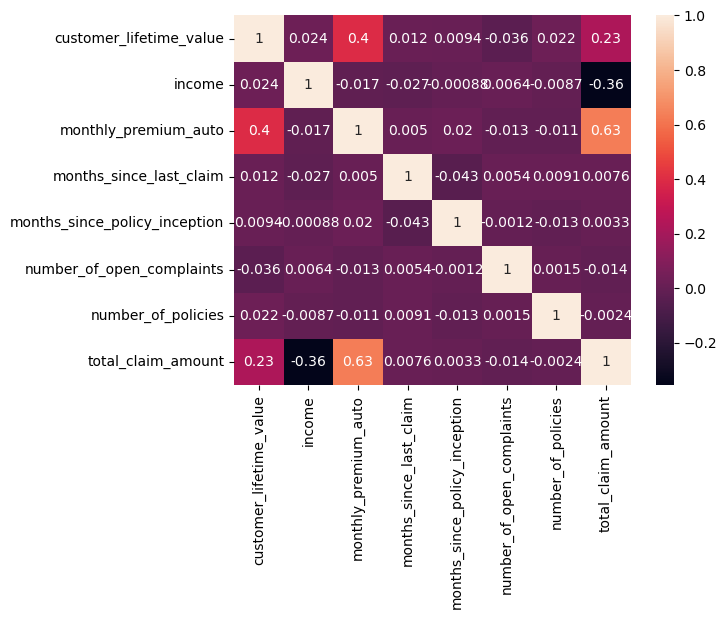

In [13]:
correlations_matrix = customer_df_num.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

The highest correlation is between "total_claim_amount" and "monthly_premium_auto" which makes sense because if a customer increases the total amount of claims regarding to accidents, generally, the amount of money the customer pays on a monthly basis as a premium for their auto insurance coverage will also go up, thus the correlation between both variables.

#### 10. Define a function that takes a pandas DataFrame as an input and returns two pandas DataFrames: the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe. To this end, it might be helpful to count the number of unique values. The function must have an optional argument set by default to 36 to discriminate between continuous and discrete columns. Then, use it to create two new dataframes: continuous_df and discrete_df.

In [14]:
def type_numerical_dataframe(dataframe: pd.DataFrame, number_unique_values: int = 36) ->pd.DataFrame:
    '''
    Function that takes a pandas DataFrame as an input and returns two pandas DataFrames:
    the first containing numerical continuous columns and the second containing numerical discrete columns of the input dataframe.
    '''
    discrete_columns = [column for column, unique_count in dataframe.nunique().items() if unique_count <= number_unique_values]
    continuous_columns = [column for column, unique_count in dataframe.nunique().items() if unique_count > number_unique_values]
    discrete_df = dataframe[discrete_columns]
    continuous_df = dataframe[continuous_columns]
    return discrete_df, continuous_df

customer_df_num_dis, customer_df_num_con=type_numerical_dataframe(customer_df_num)

In [15]:
customer_df_num_con

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


#### 11. Create a function to create a barplot for all the columns of the discrete_df using seaborn, and set the figuresize = (16,16).

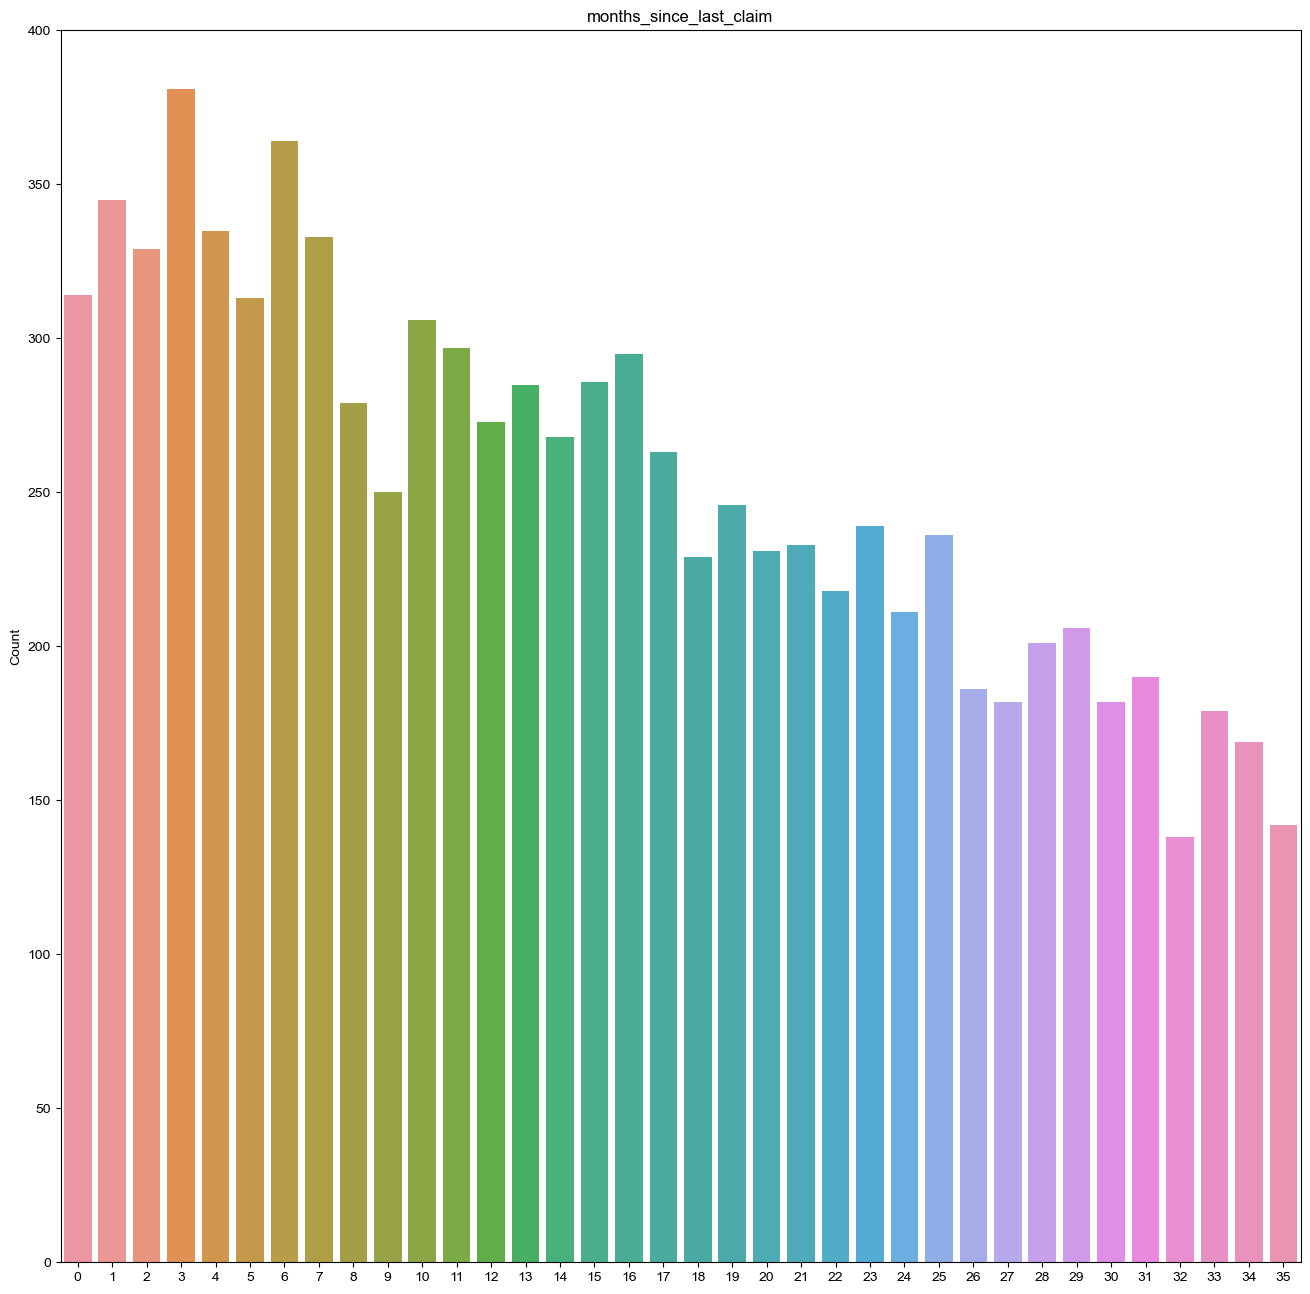

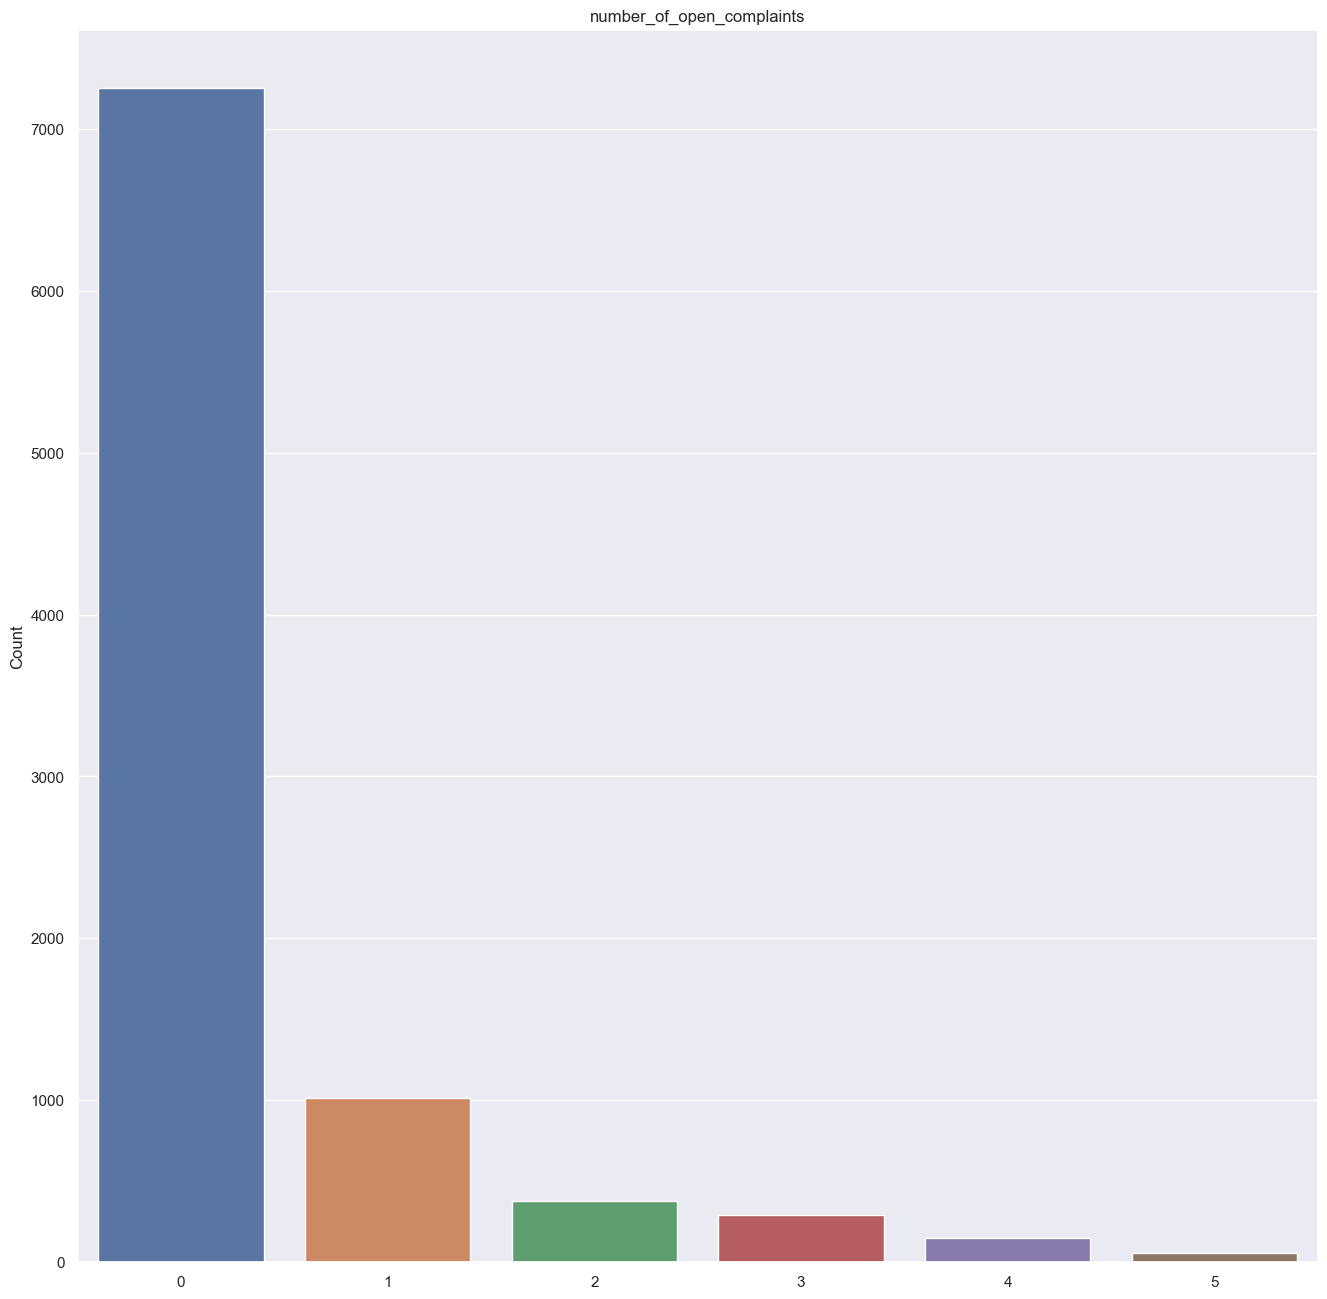

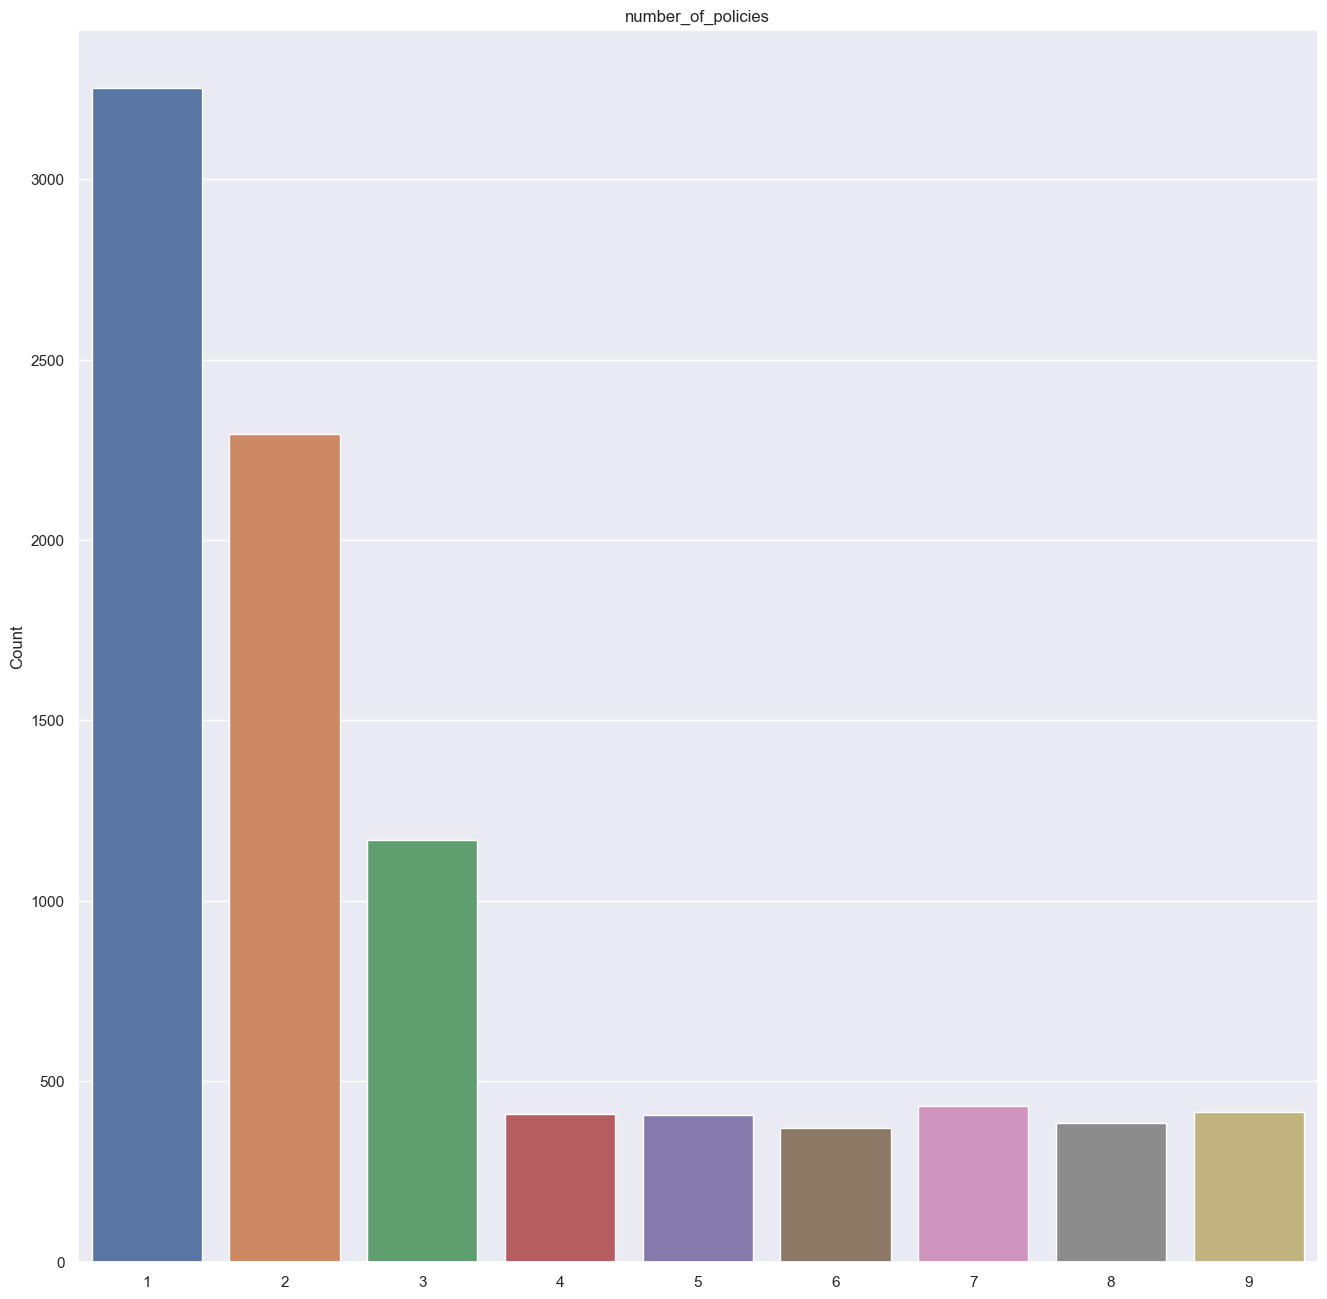

In [16]:
def barplot_discrete(dataframe: pd.DataFrame):
    '''
    Creates barplots with value counts for every column of a dataframe with discrete values.
    '''
    for column in dataframe.columns:
        fig,ax = plt.subplots(figsize=(16, 16))
        value_counts = dataframe[column].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values)
        sns.set(style="darkgrid")
        plt.ylabel('Count')
        plt.title(column)
        plt.show()
        
barplot_discrete(customer_df_num_dis)

#### 12. Create a function to create a histogram for all the columns of the continuous_df using seaborn, and set the figuresize = (16,16)

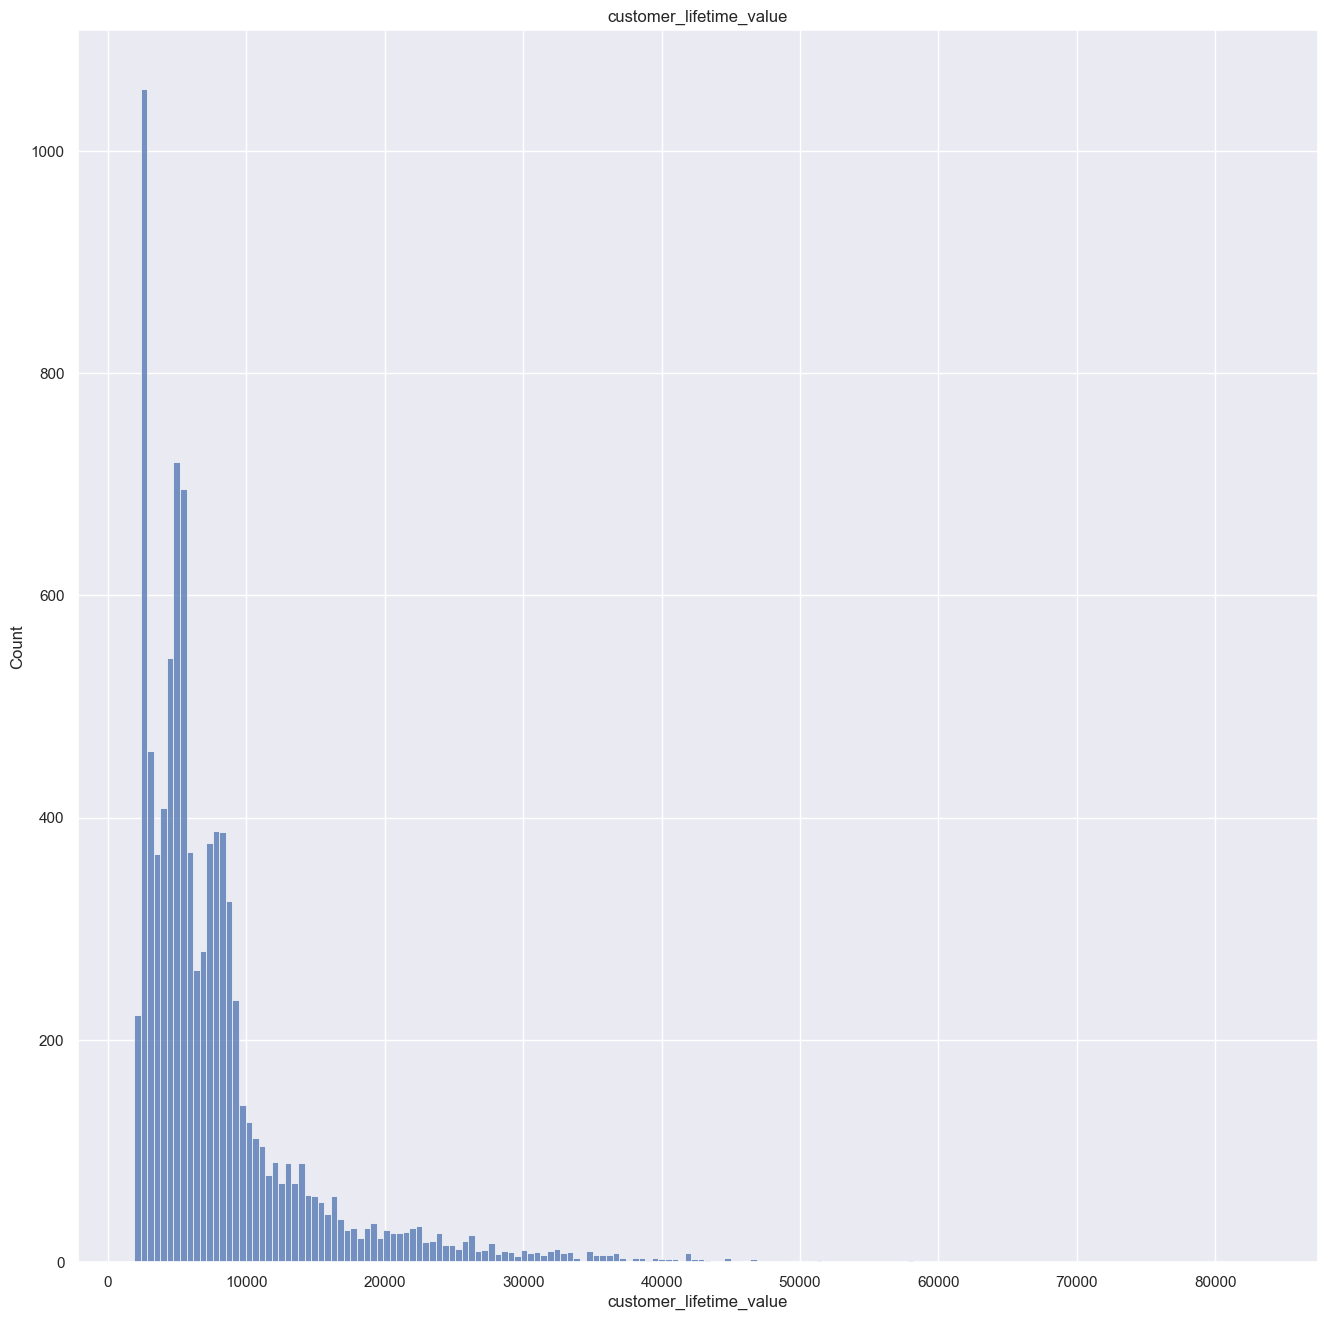

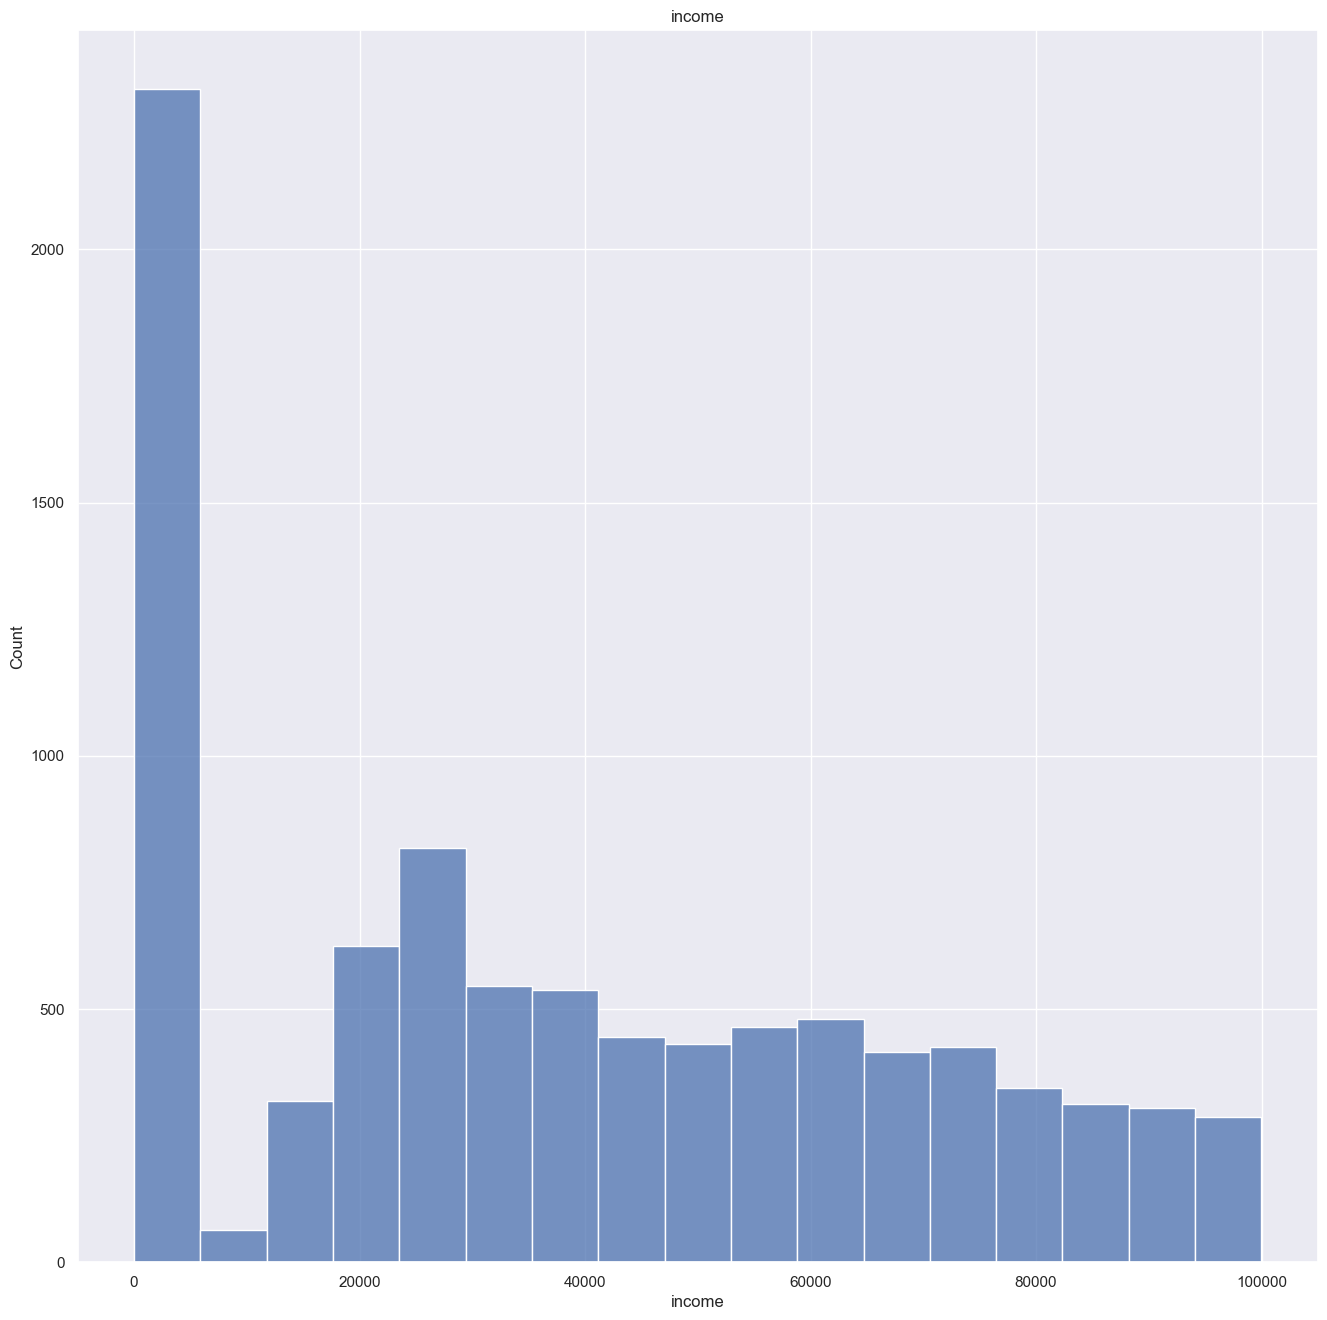

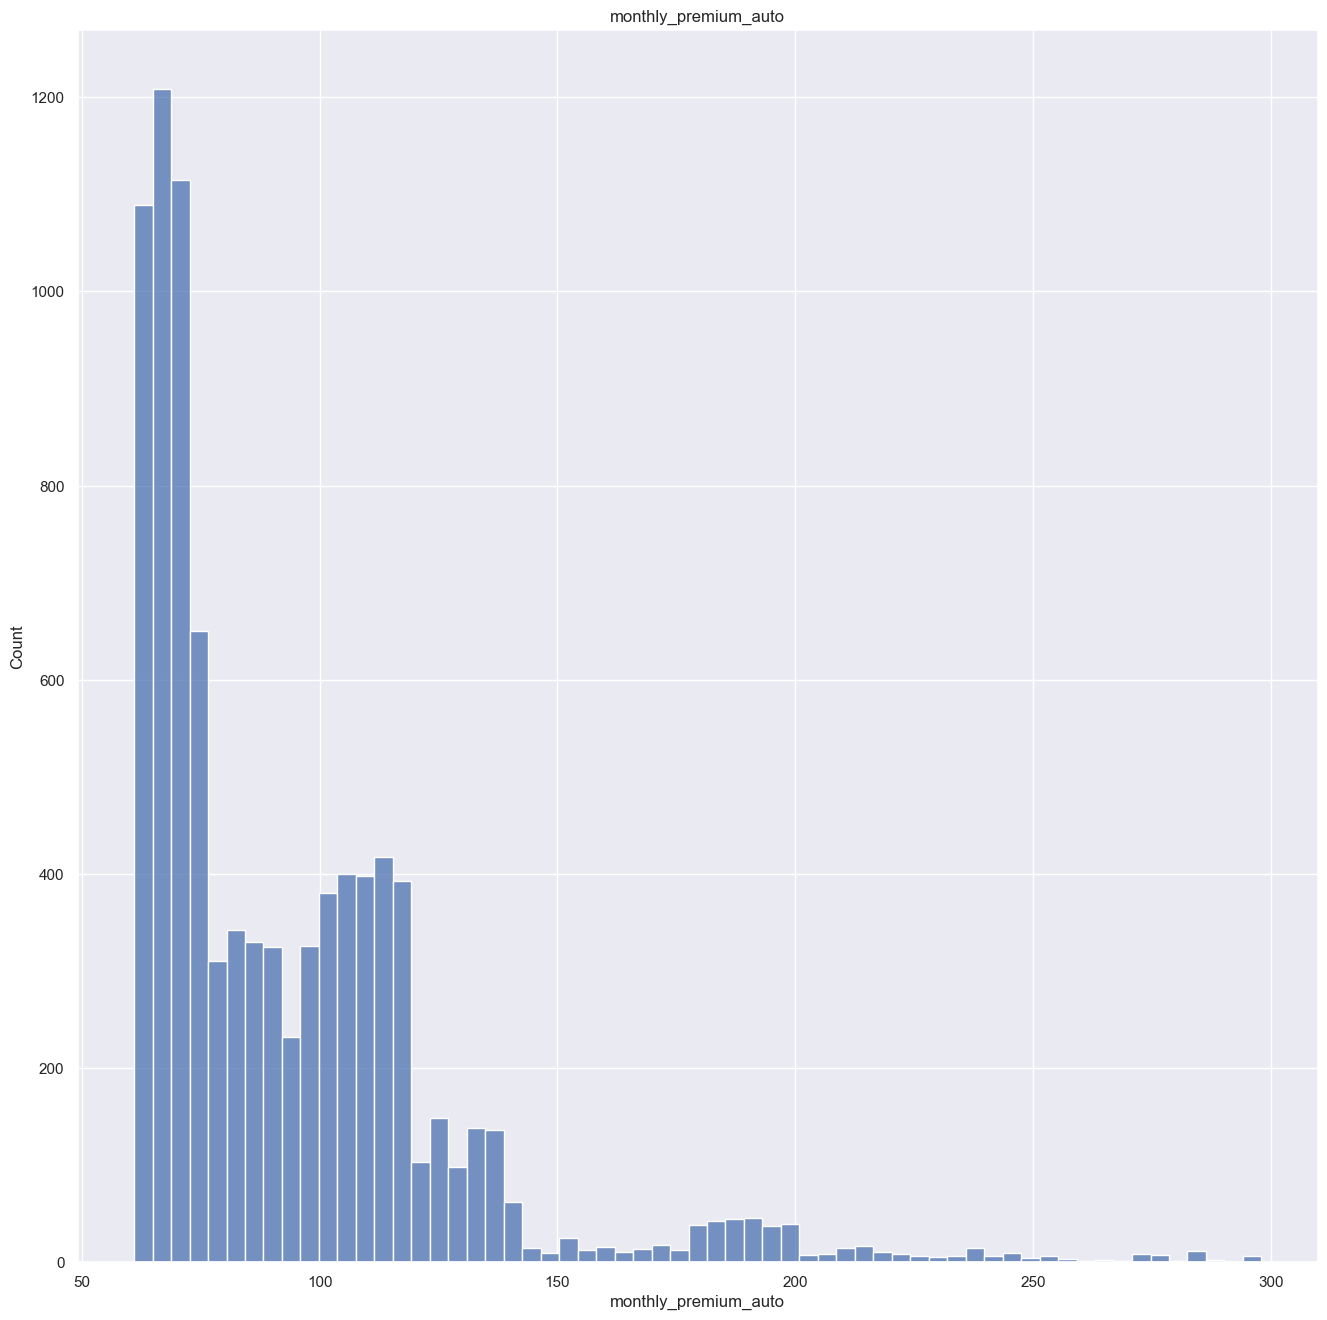

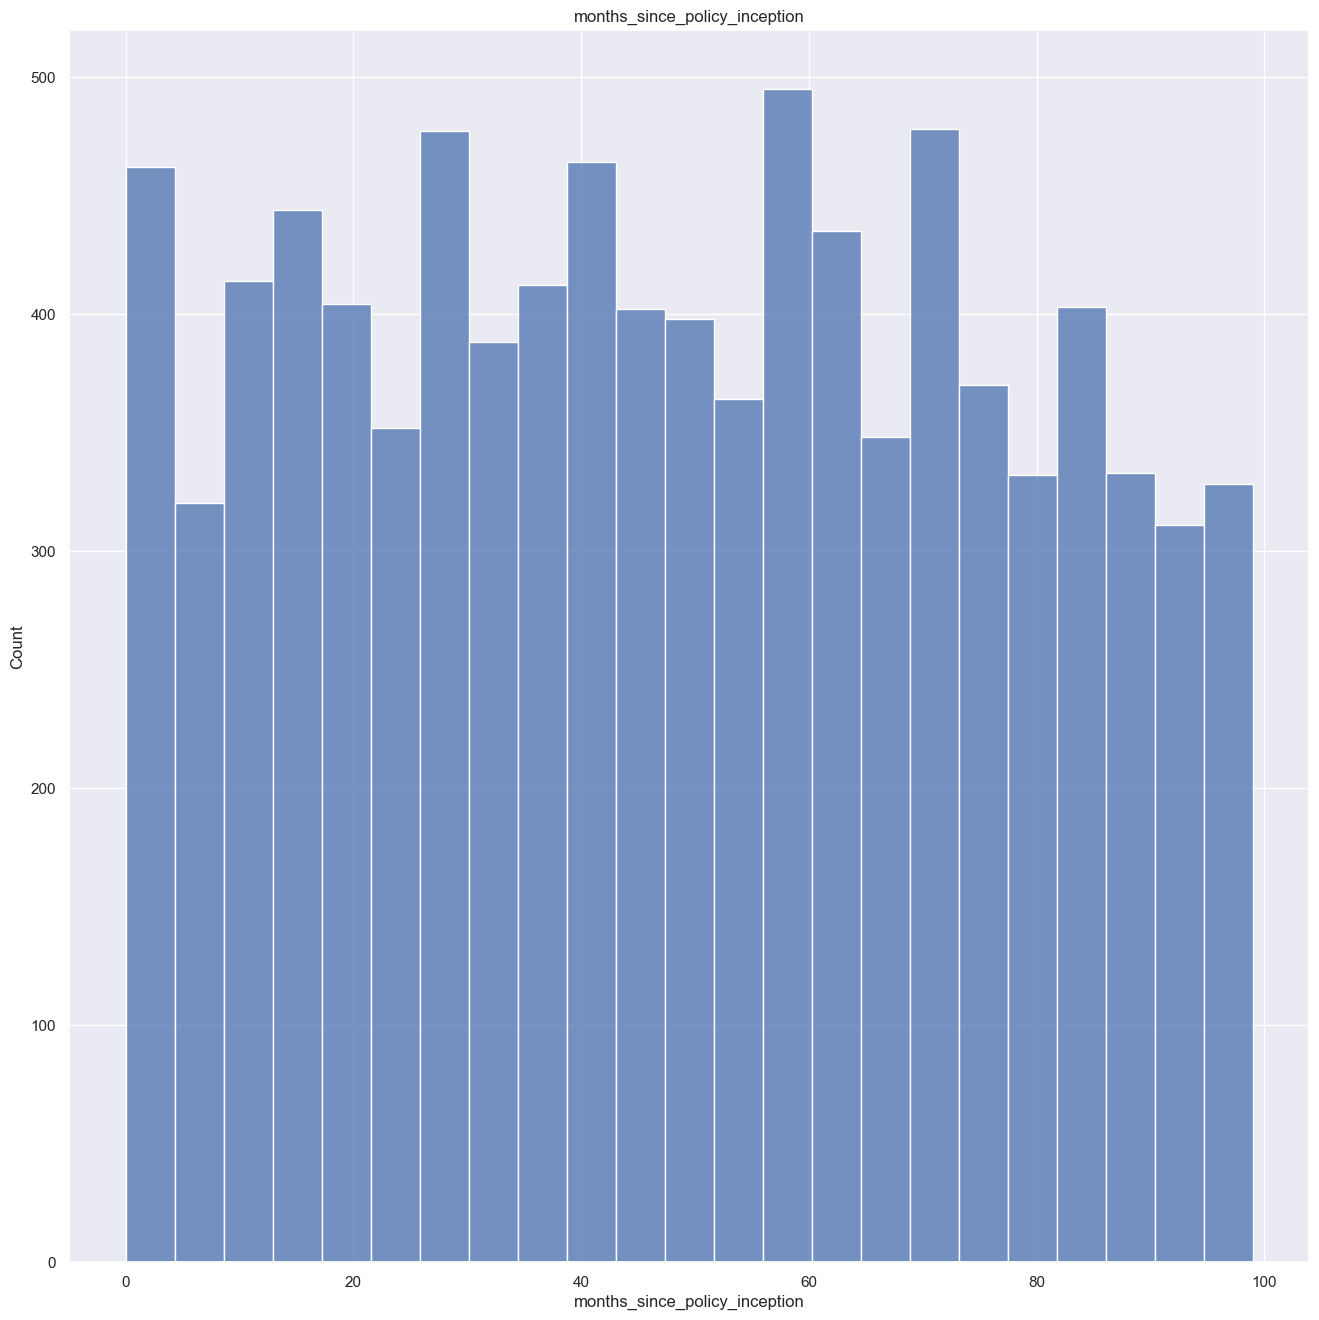

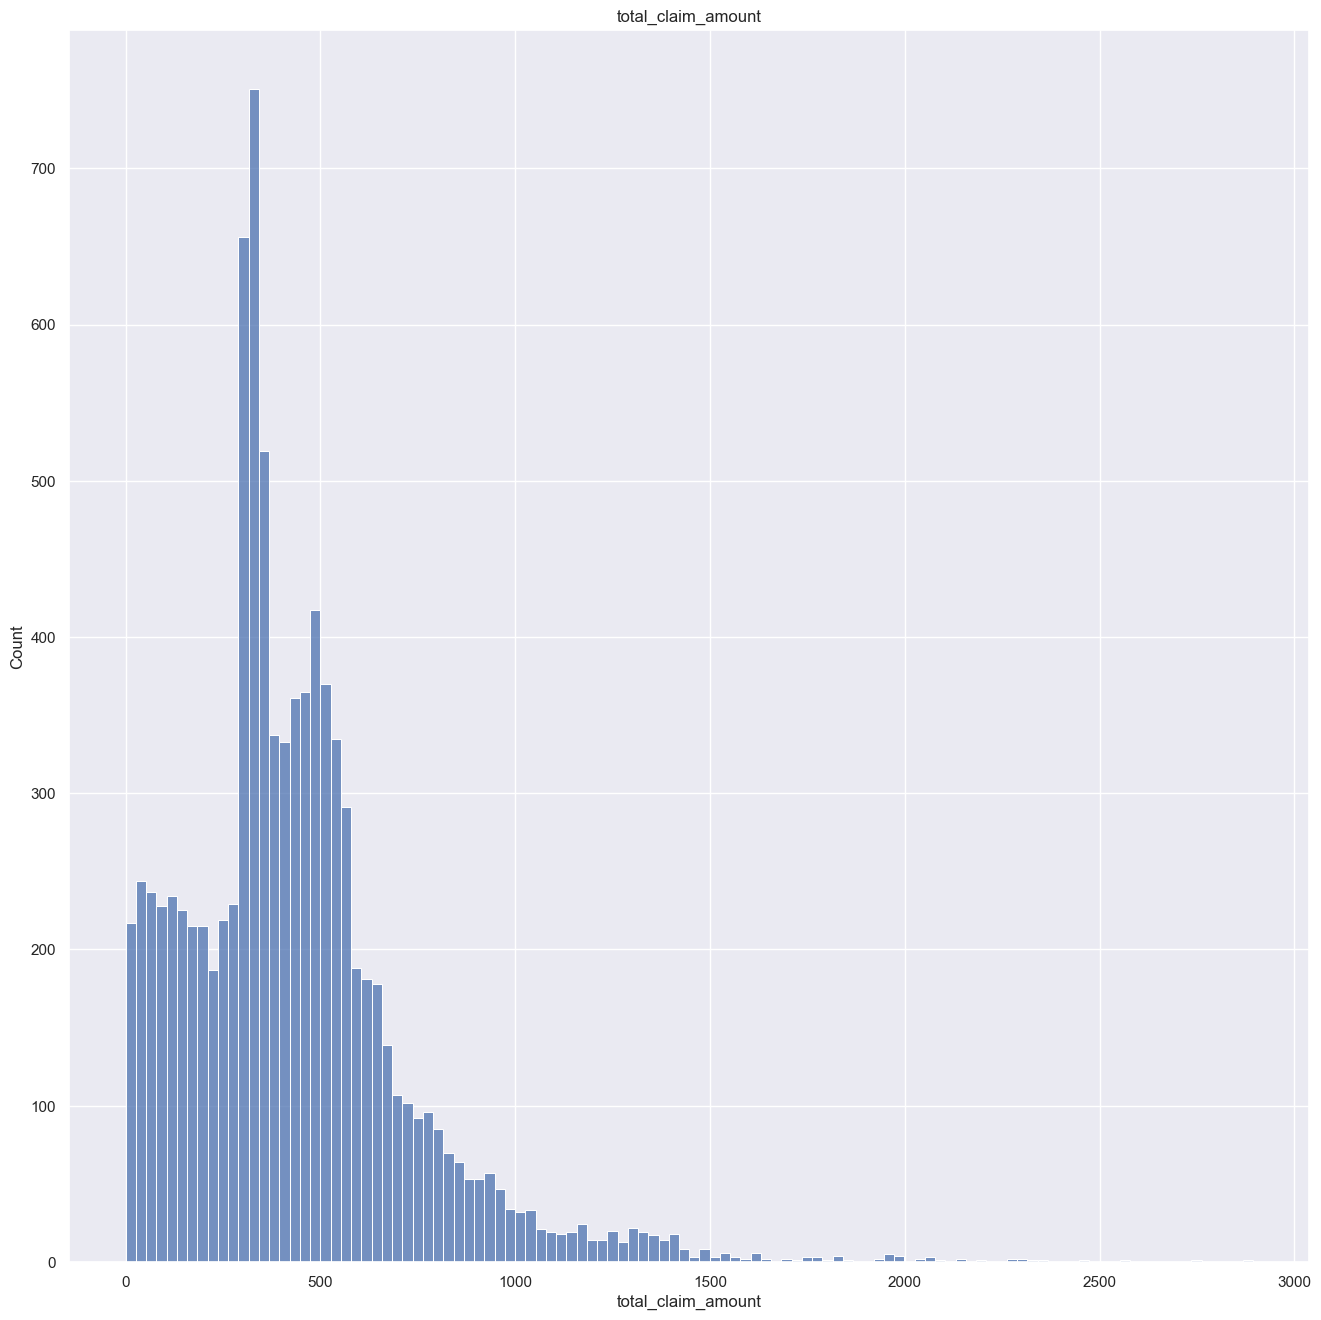

In [17]:
def histplot_continuous(dataframe: pd.DataFrame):
    '''
    Creates histplots with bins for every column of a dataframe with continuous values.
    '''
    for column in dataframe.columns:
        fig,ax = plt.subplots(figsize=(16, 16))
        sns.histplot(data=dataframe[column])
        #sns.set(style="darkgrid")
        plt.ylabel('Count')
        plt.title(column)
        plt.show()
        
histplot_continuous(customer_df_num_con)

#### 13. According to the previous histogram plots, do you think that you will have to apply any transformation?

Since the columns appear to present a high level of skewness we would need to apply transformations so that we could use them in a model.

#### 14. Look for outliers in the continuous variables that you have found.
Hint: There was a good plot to do that. Define a function to create this kind of plot for the continuous_df.

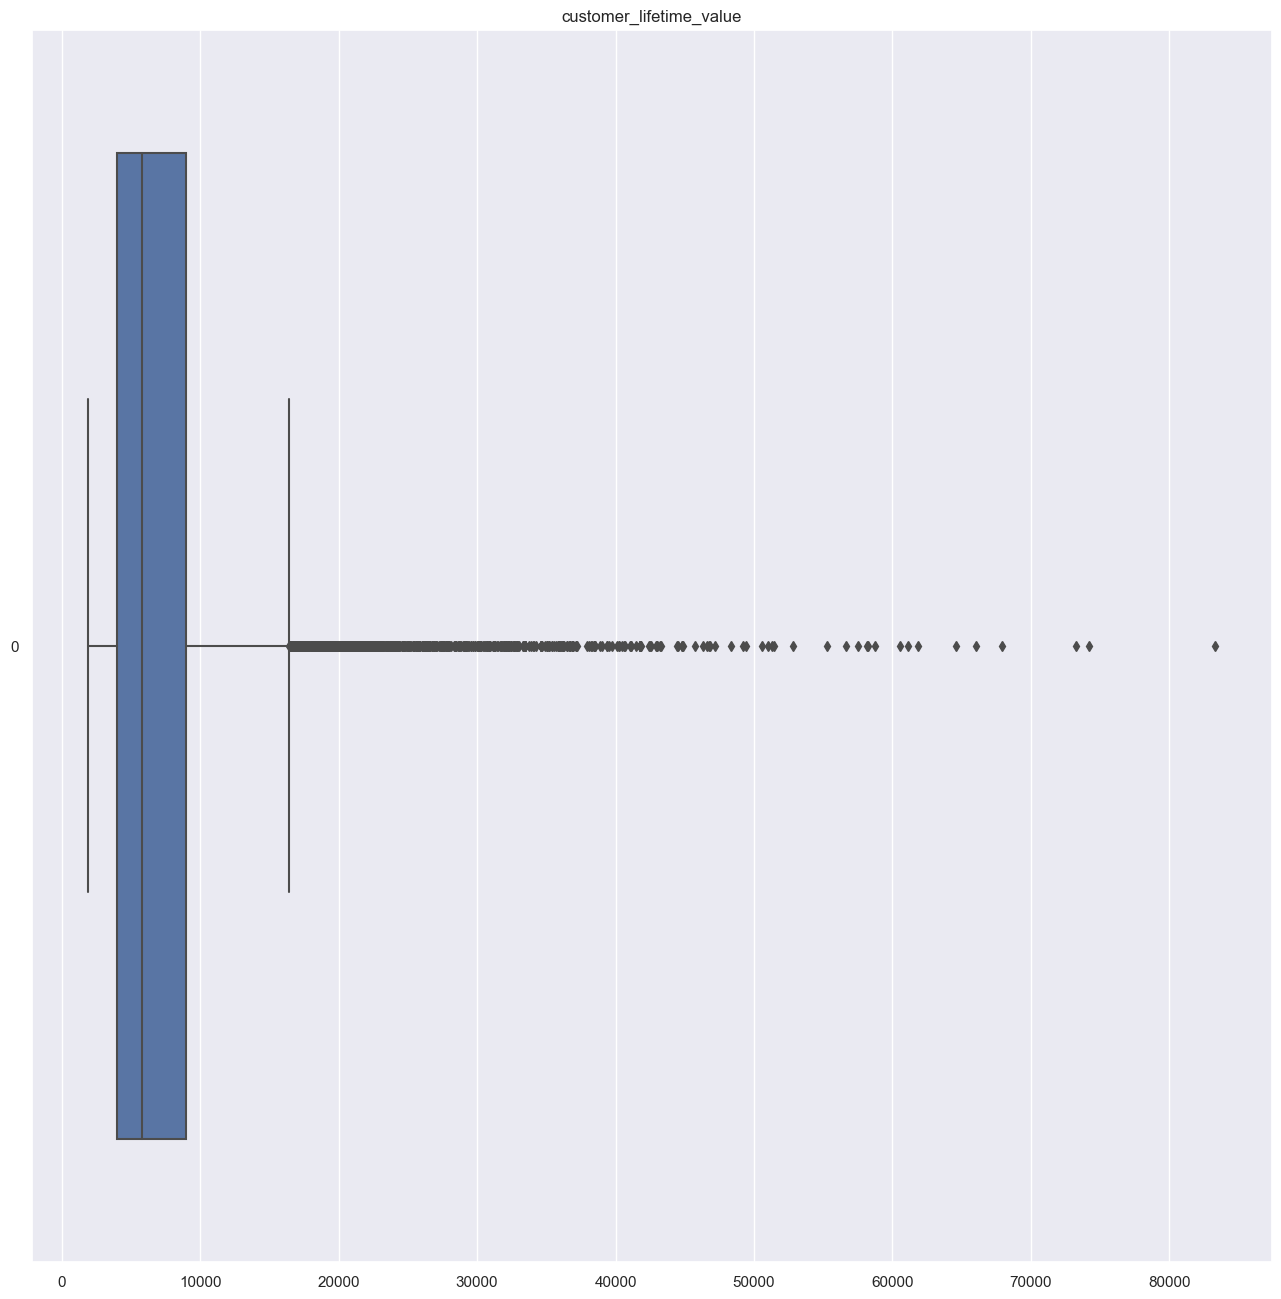

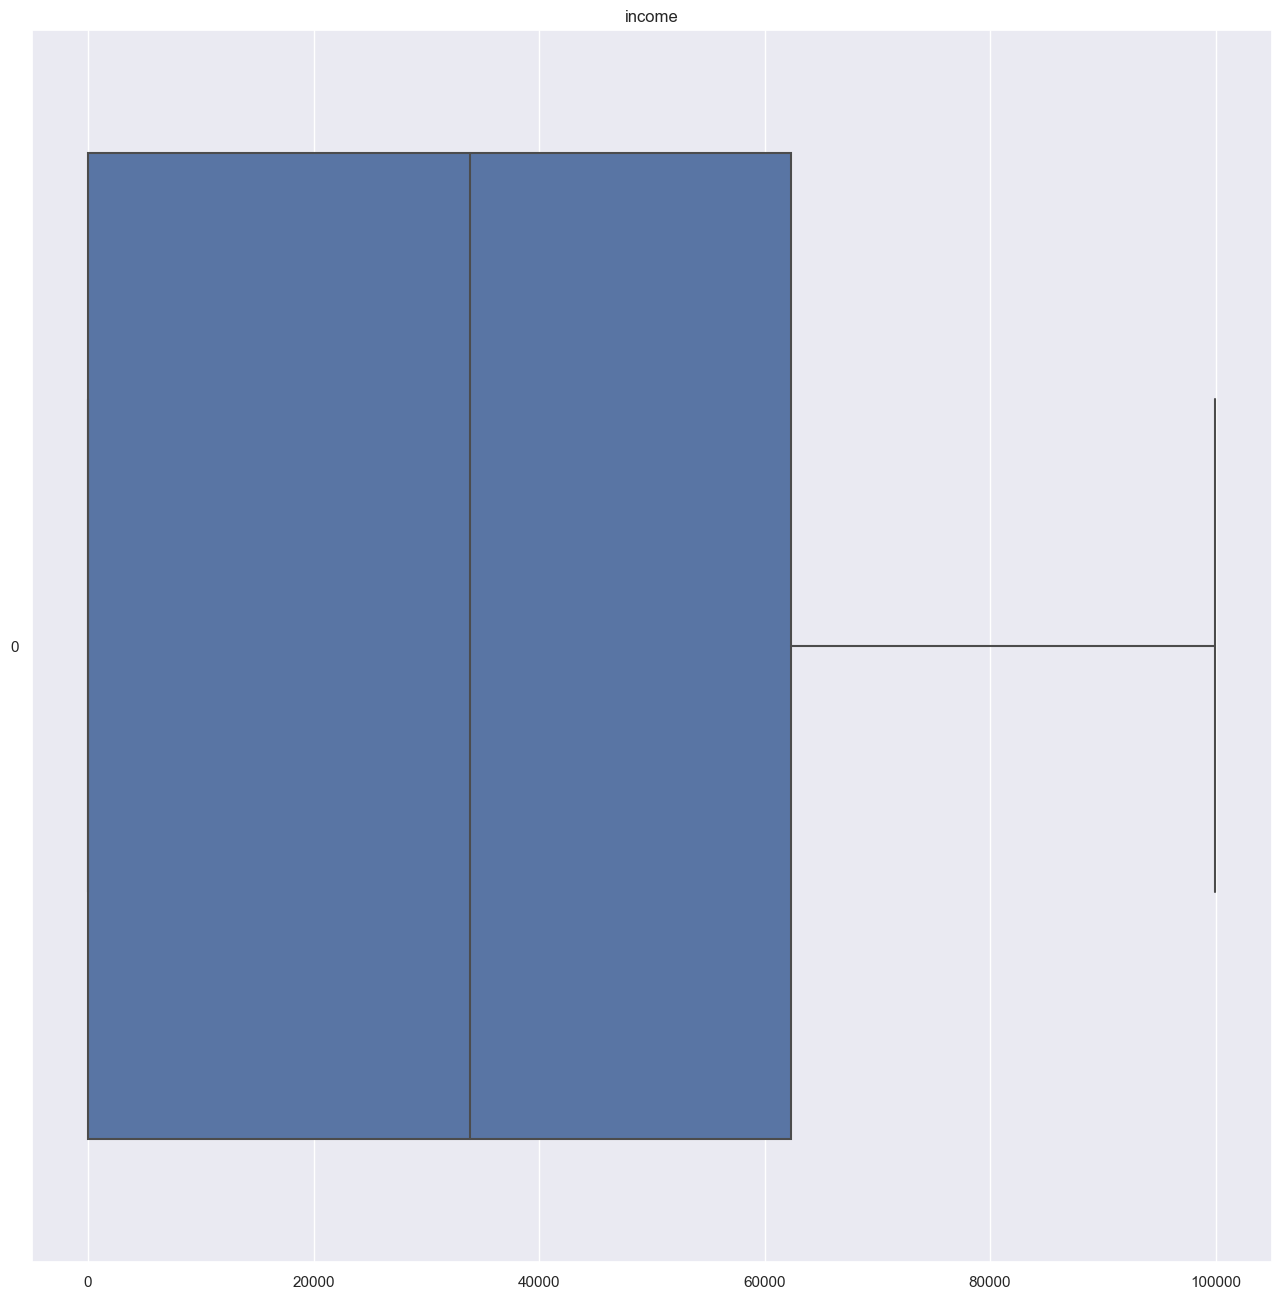

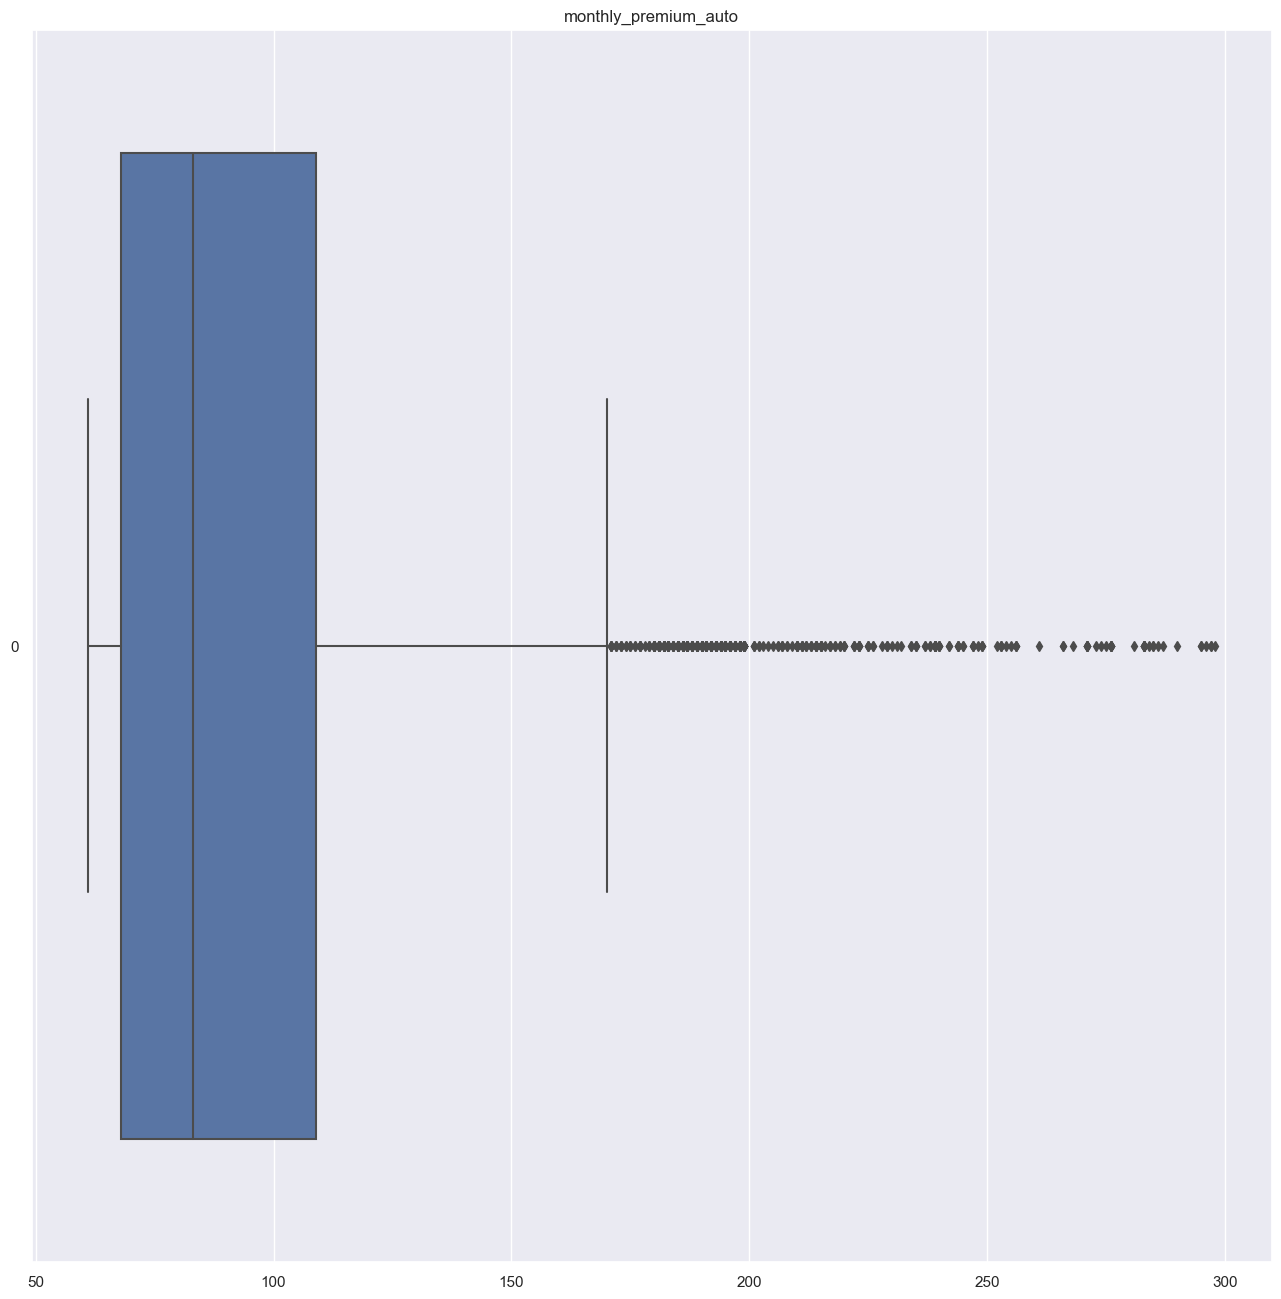

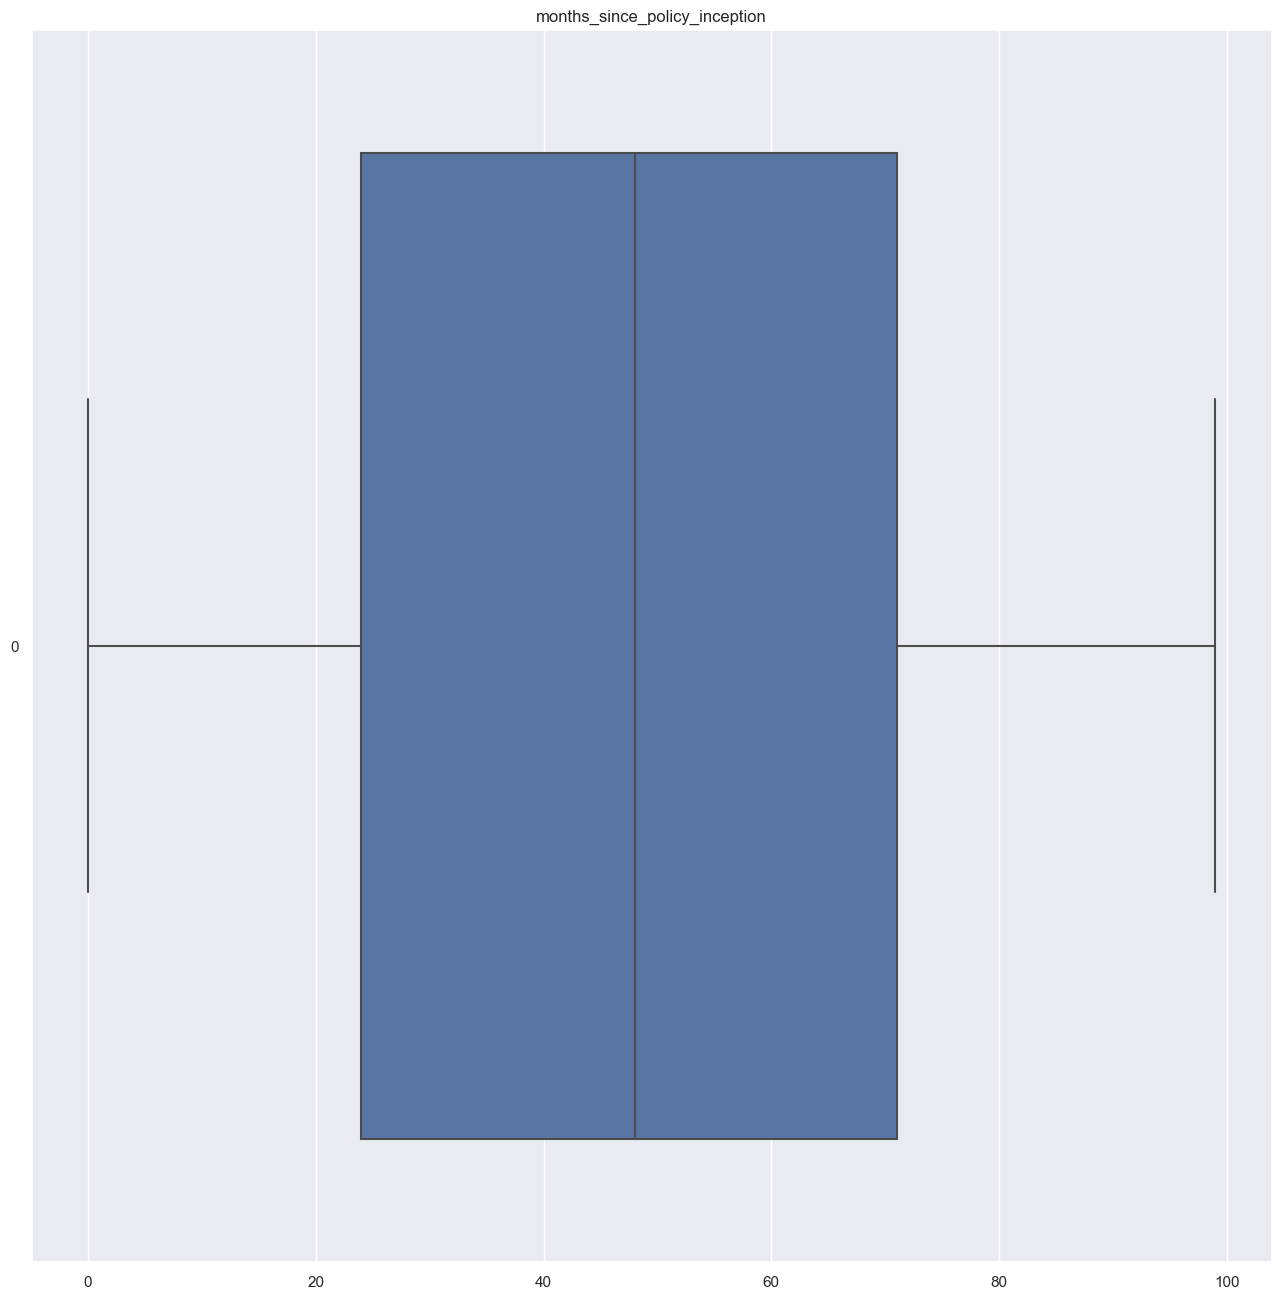

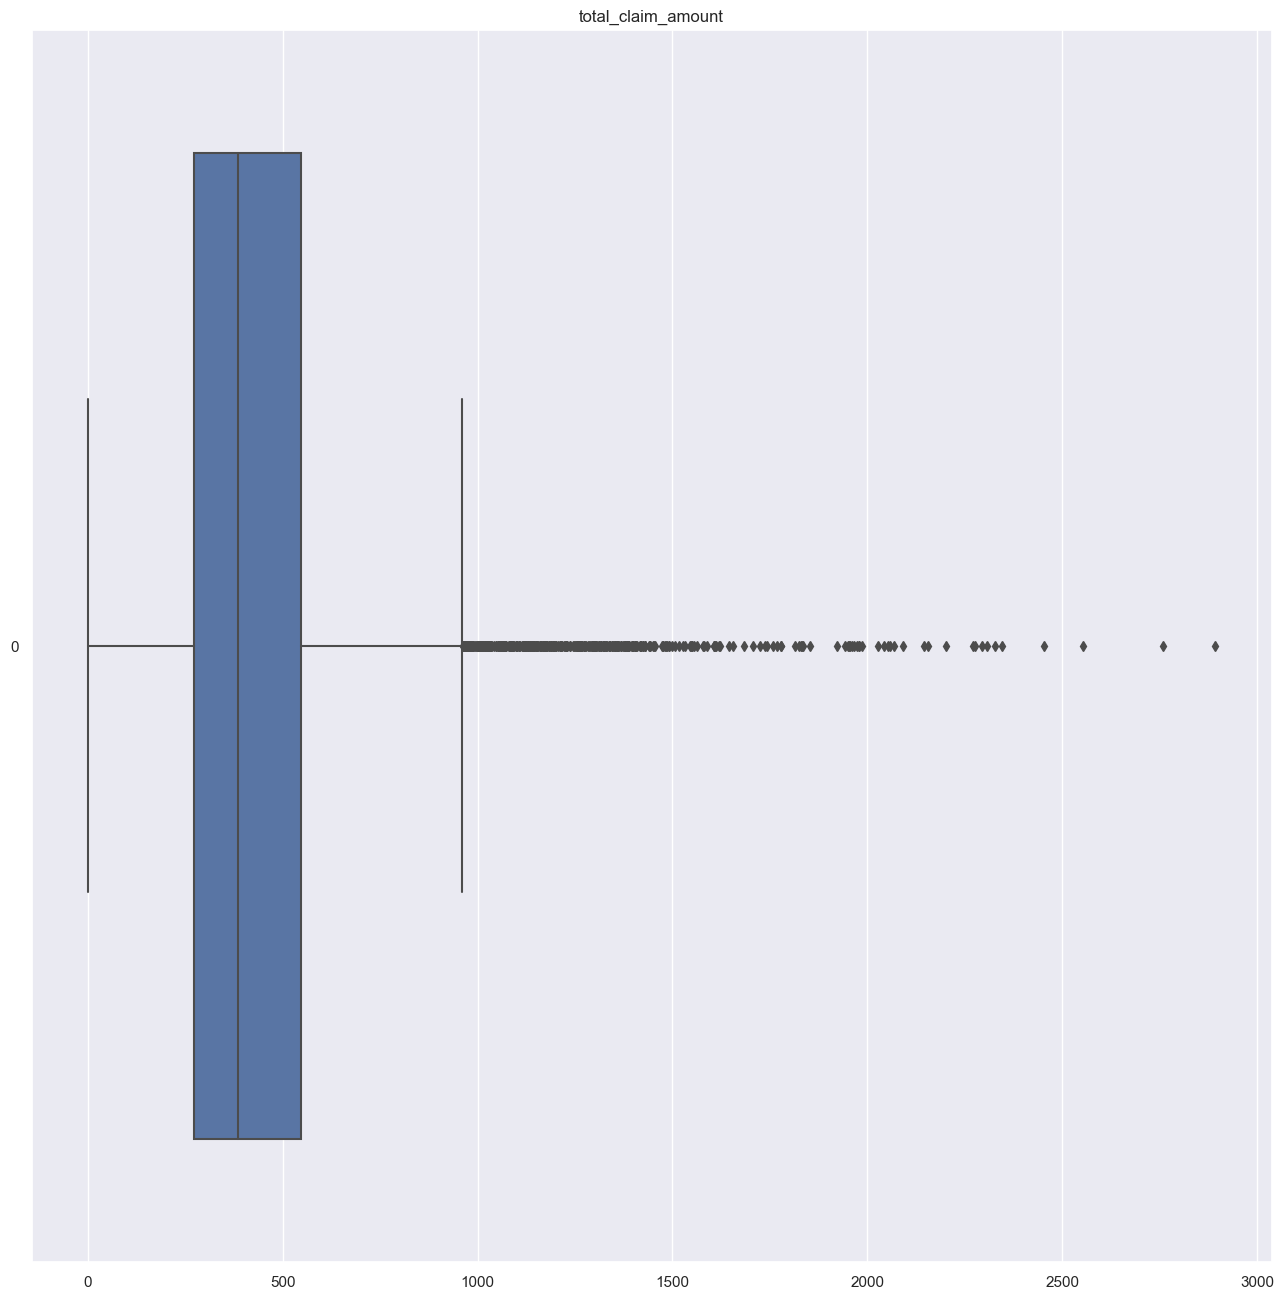

In [18]:
#the boxplot would be the best approach to do a qualitative analysis to the presence of outliers:
def boxplot_continuous(dataframe: pd.DataFrame):
    '''
    Creates boxplots for every column of a dataframe with continuous values.
    '''
    for column in dataframe.columns:
        fig,ax = plt.subplots(figsize=(16, 16))
        sns.boxplot(data=dataframe[column], orient='h')
        plt.title(column)
        plt.show()
        
boxplot_continuous(customer_df_num_con)

We can find some isolated dots in the customer_lifetime_value, monthly_premium_auto and total_claim_amount boxplots.

# Lab | Cleaning categorical data

#### Instructions
1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column. Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.
2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.
3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)
4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:

-day with the day number of effective_to_date

-day_name with the day NAME of effective_to_date

-week with the week of effective_to_date

-month with the month NAME of effective_to_date

-total_claim_amount with total_claim_amount

5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)
6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?
7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()
9. Plot the median "target" by day of the week name using a seaborn barplot
10. What can you conclude from this analysis?
11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)
12. Can you do a monthly analysis given the output of the previous series? Why?
13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).
14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.
15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.
16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.
17. Turn the response column values into (Yes=1/No=0).
18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
20. Deal with column Gender turning the values into (1/0).
21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.
22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".
23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".
24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".
25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".
26. Get a dataframe with the categorical nominal columns
27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column: ie:
levels = [ [col1_value1, col1_value2,...], [col2_value1, col2_value2,...], ...]
28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

#### 1. Define a function that given a pandas DataFrame as input creates a seaborn countplot of each categorical column.
Make sure to sort the bars by frequency ie: the most frequent values should be placed first. Hint: use .value_counts(). In addition, if the amount of unique values of a categorical column (cardinality) is six or more, the corresponding countplot should have the bars placed on the y-axis instead of the x-axis.

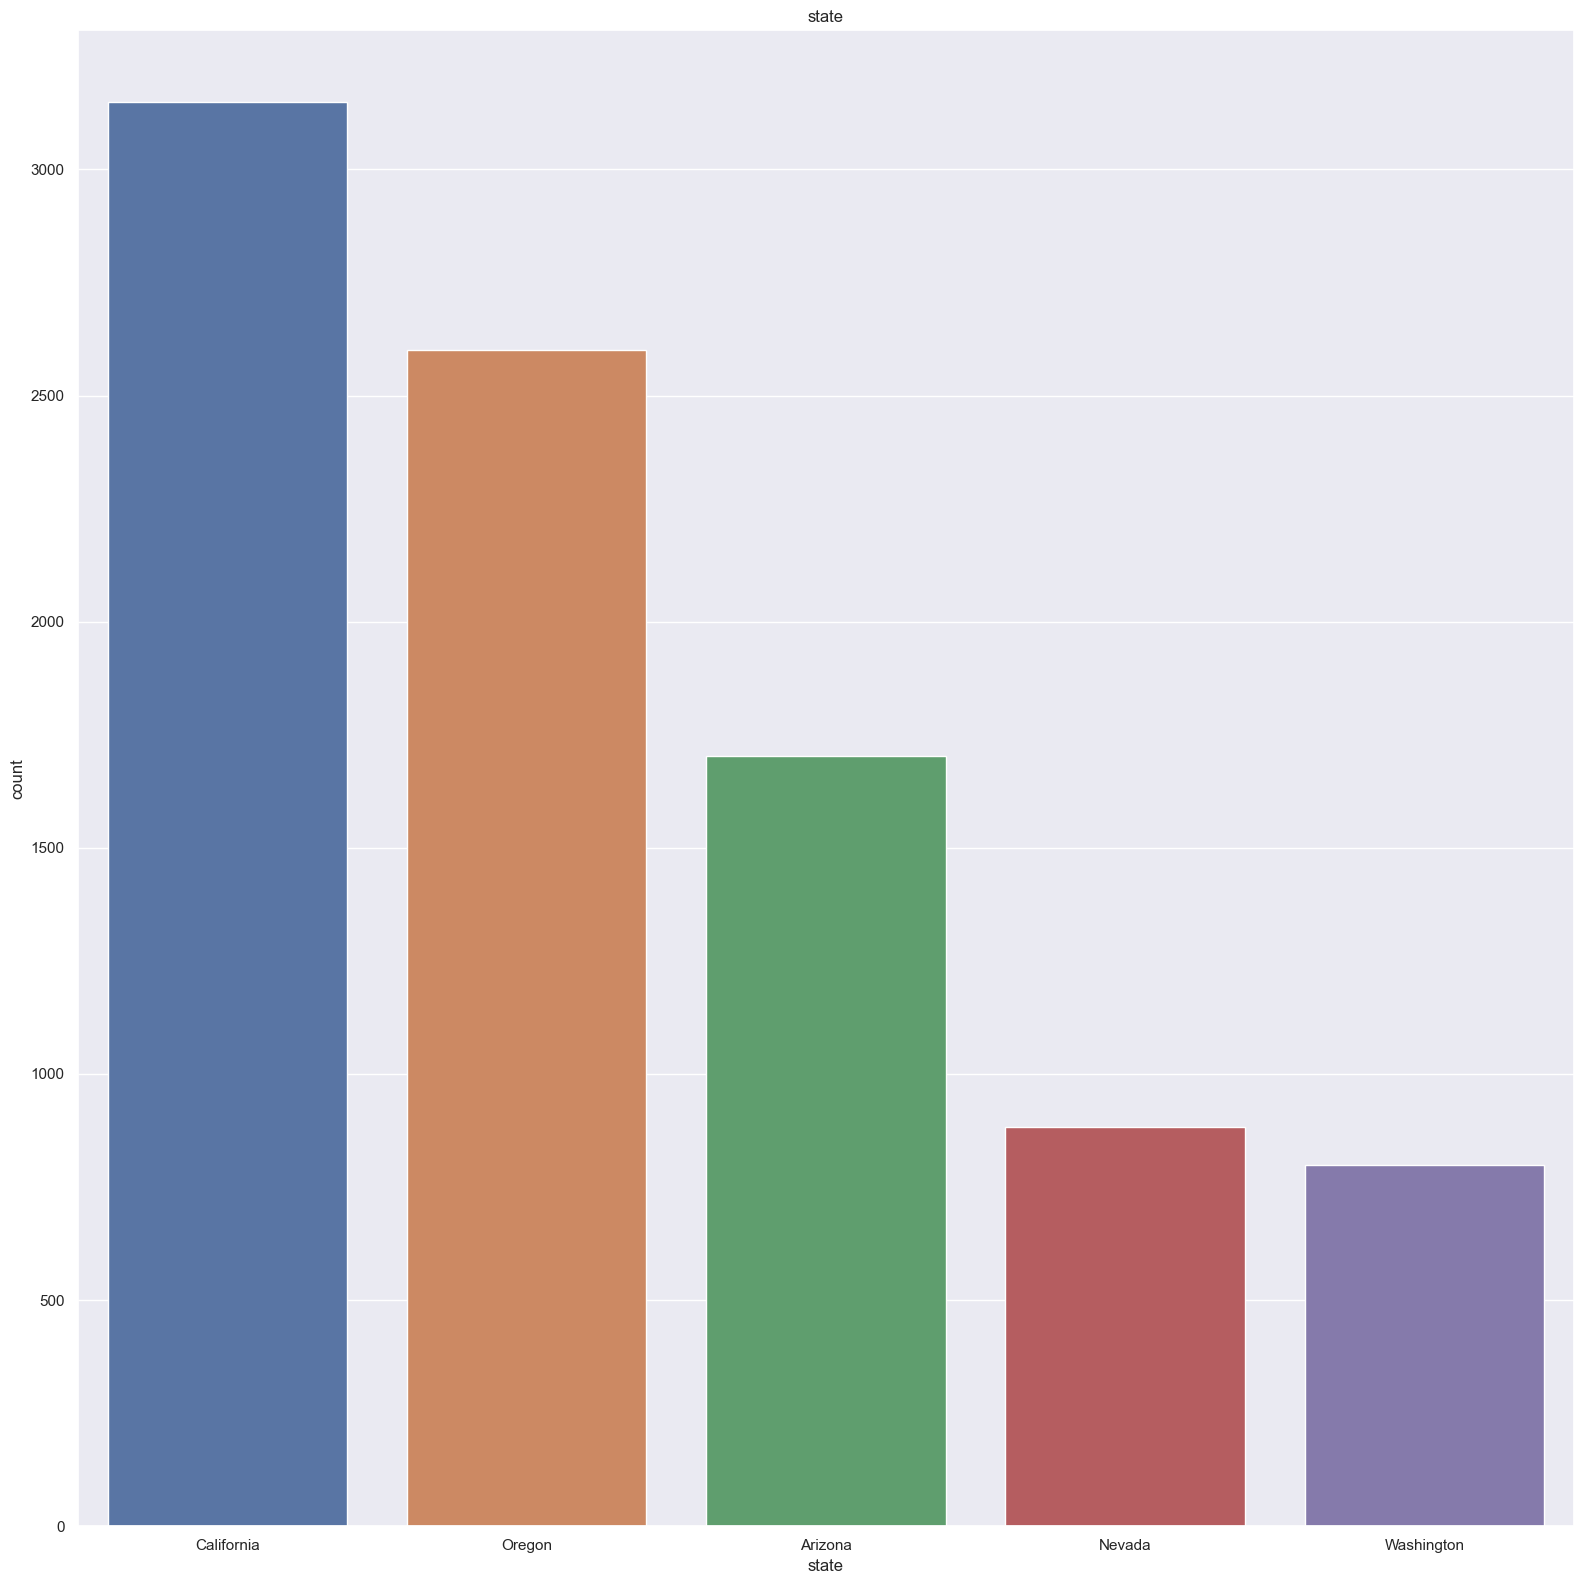

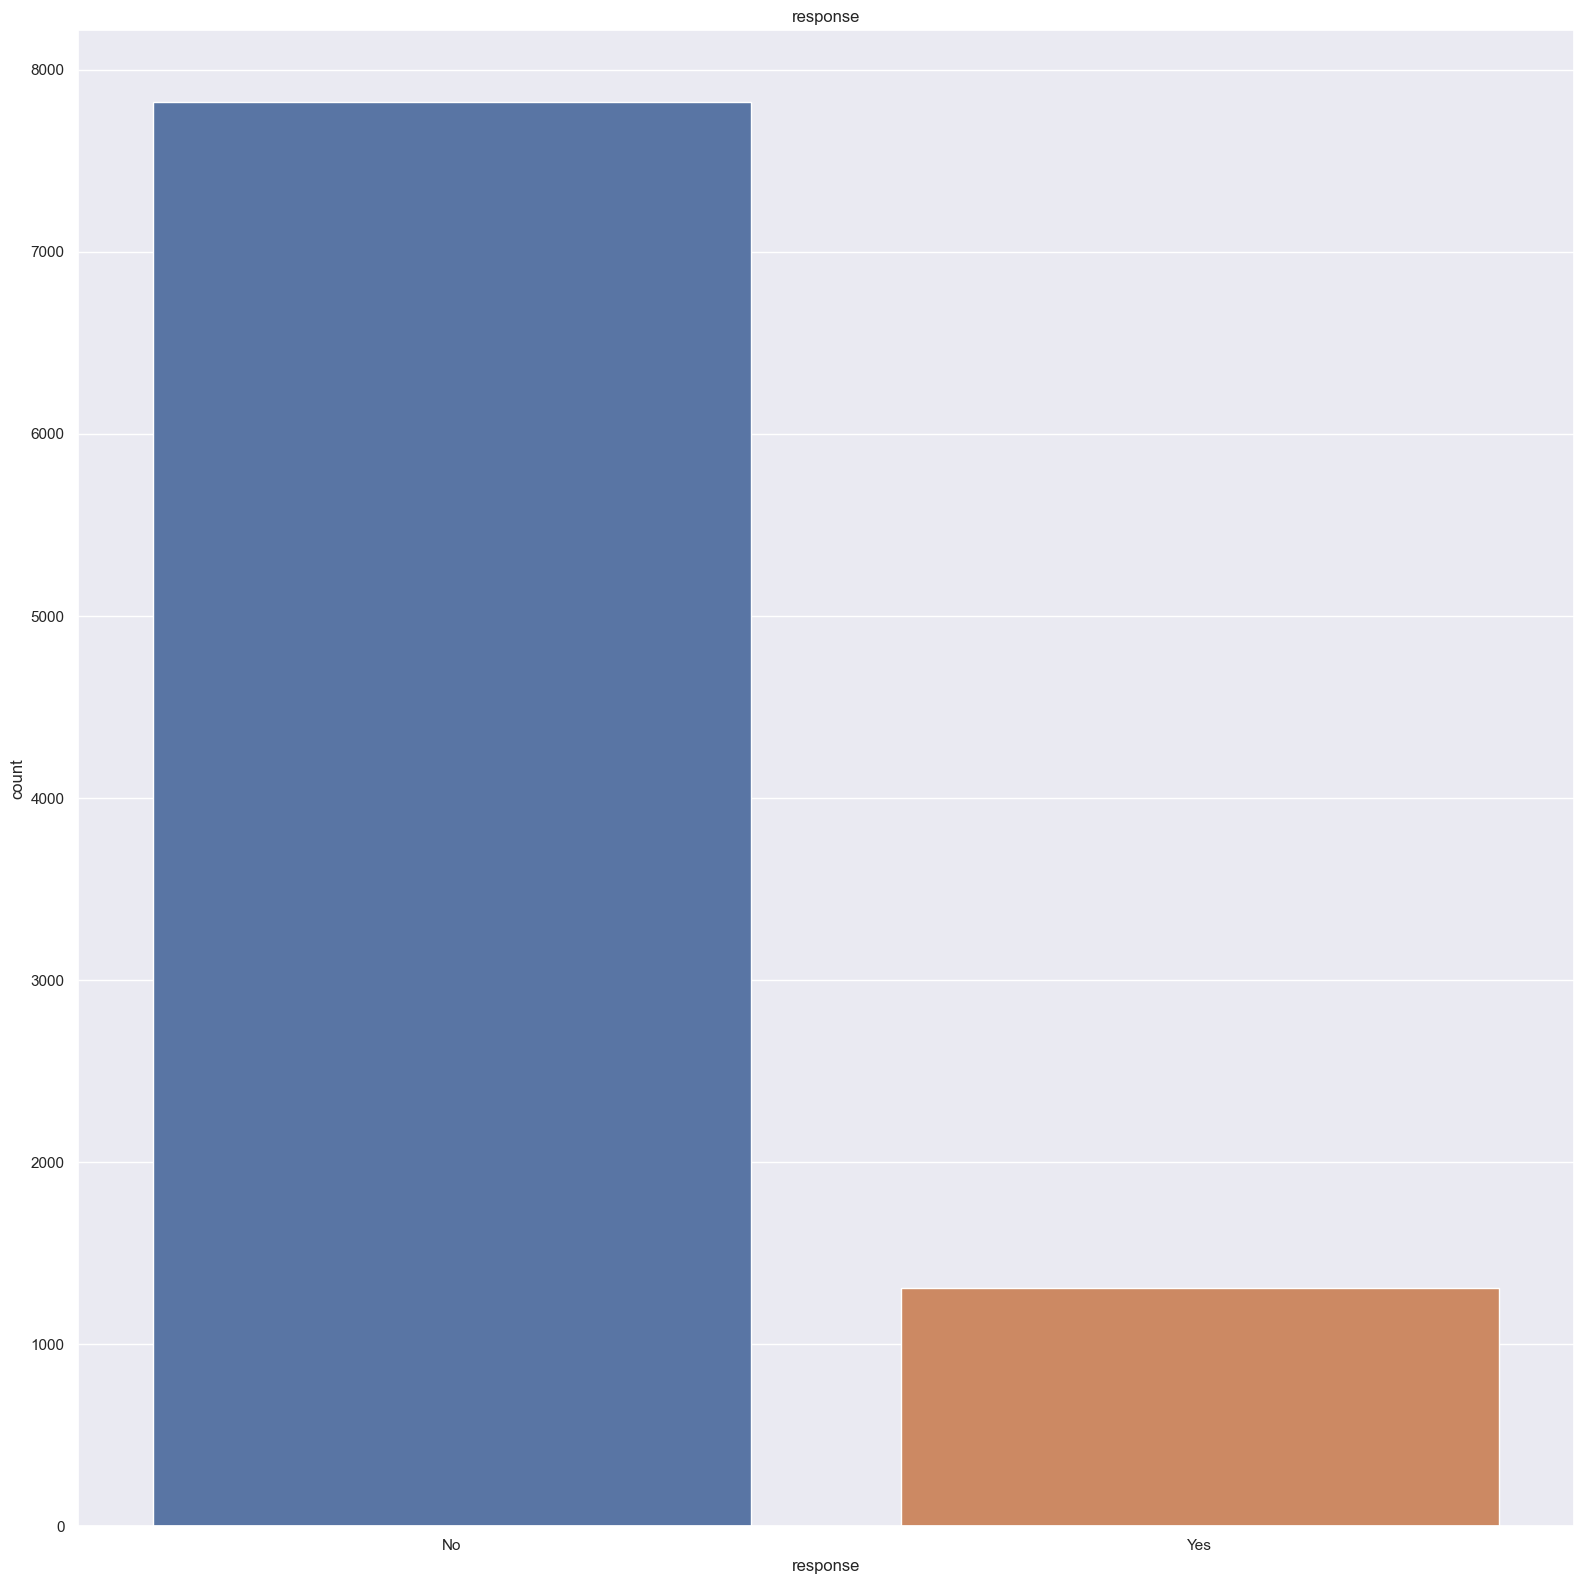

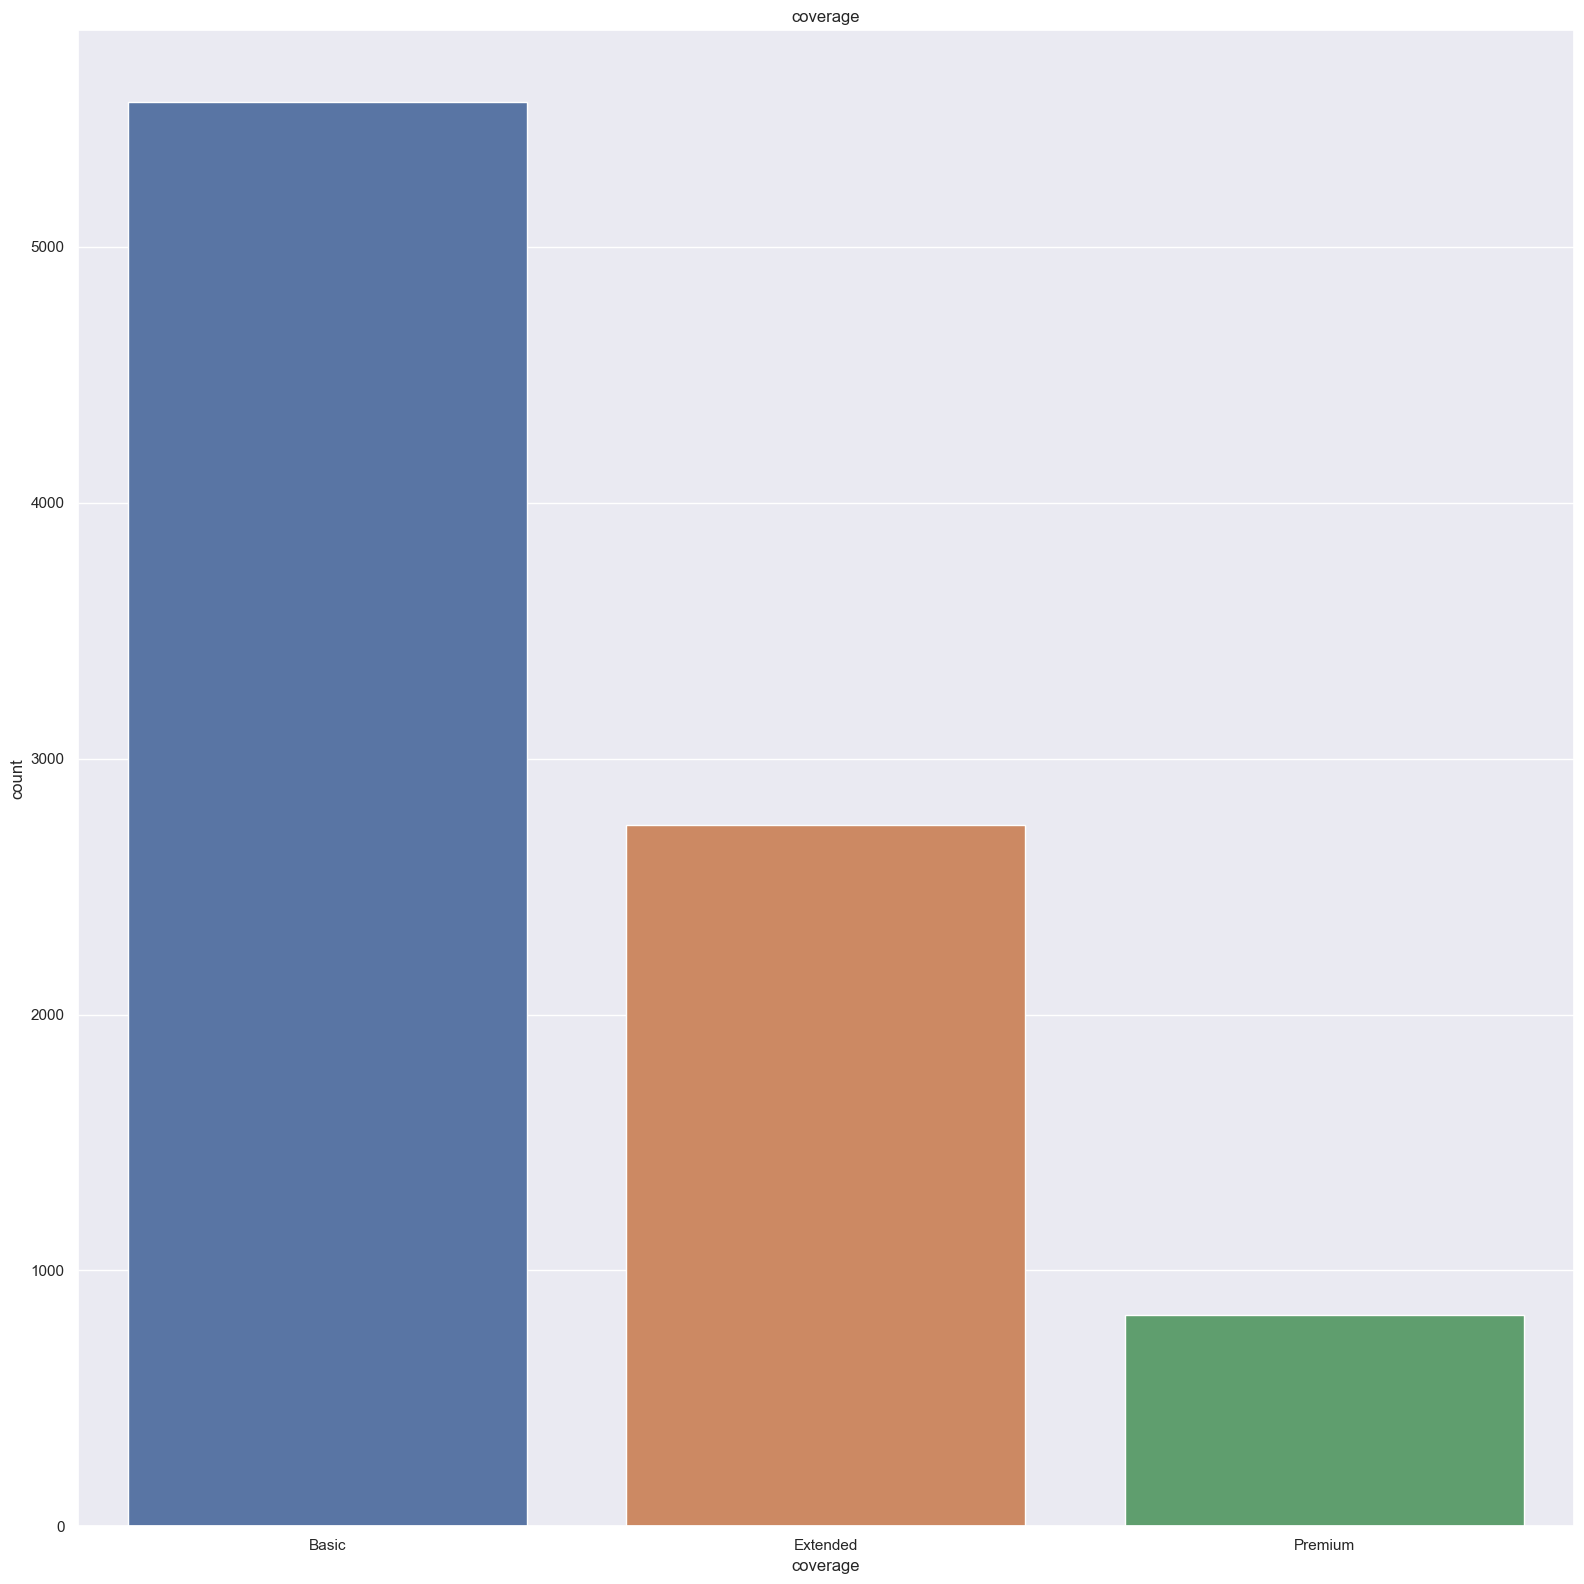

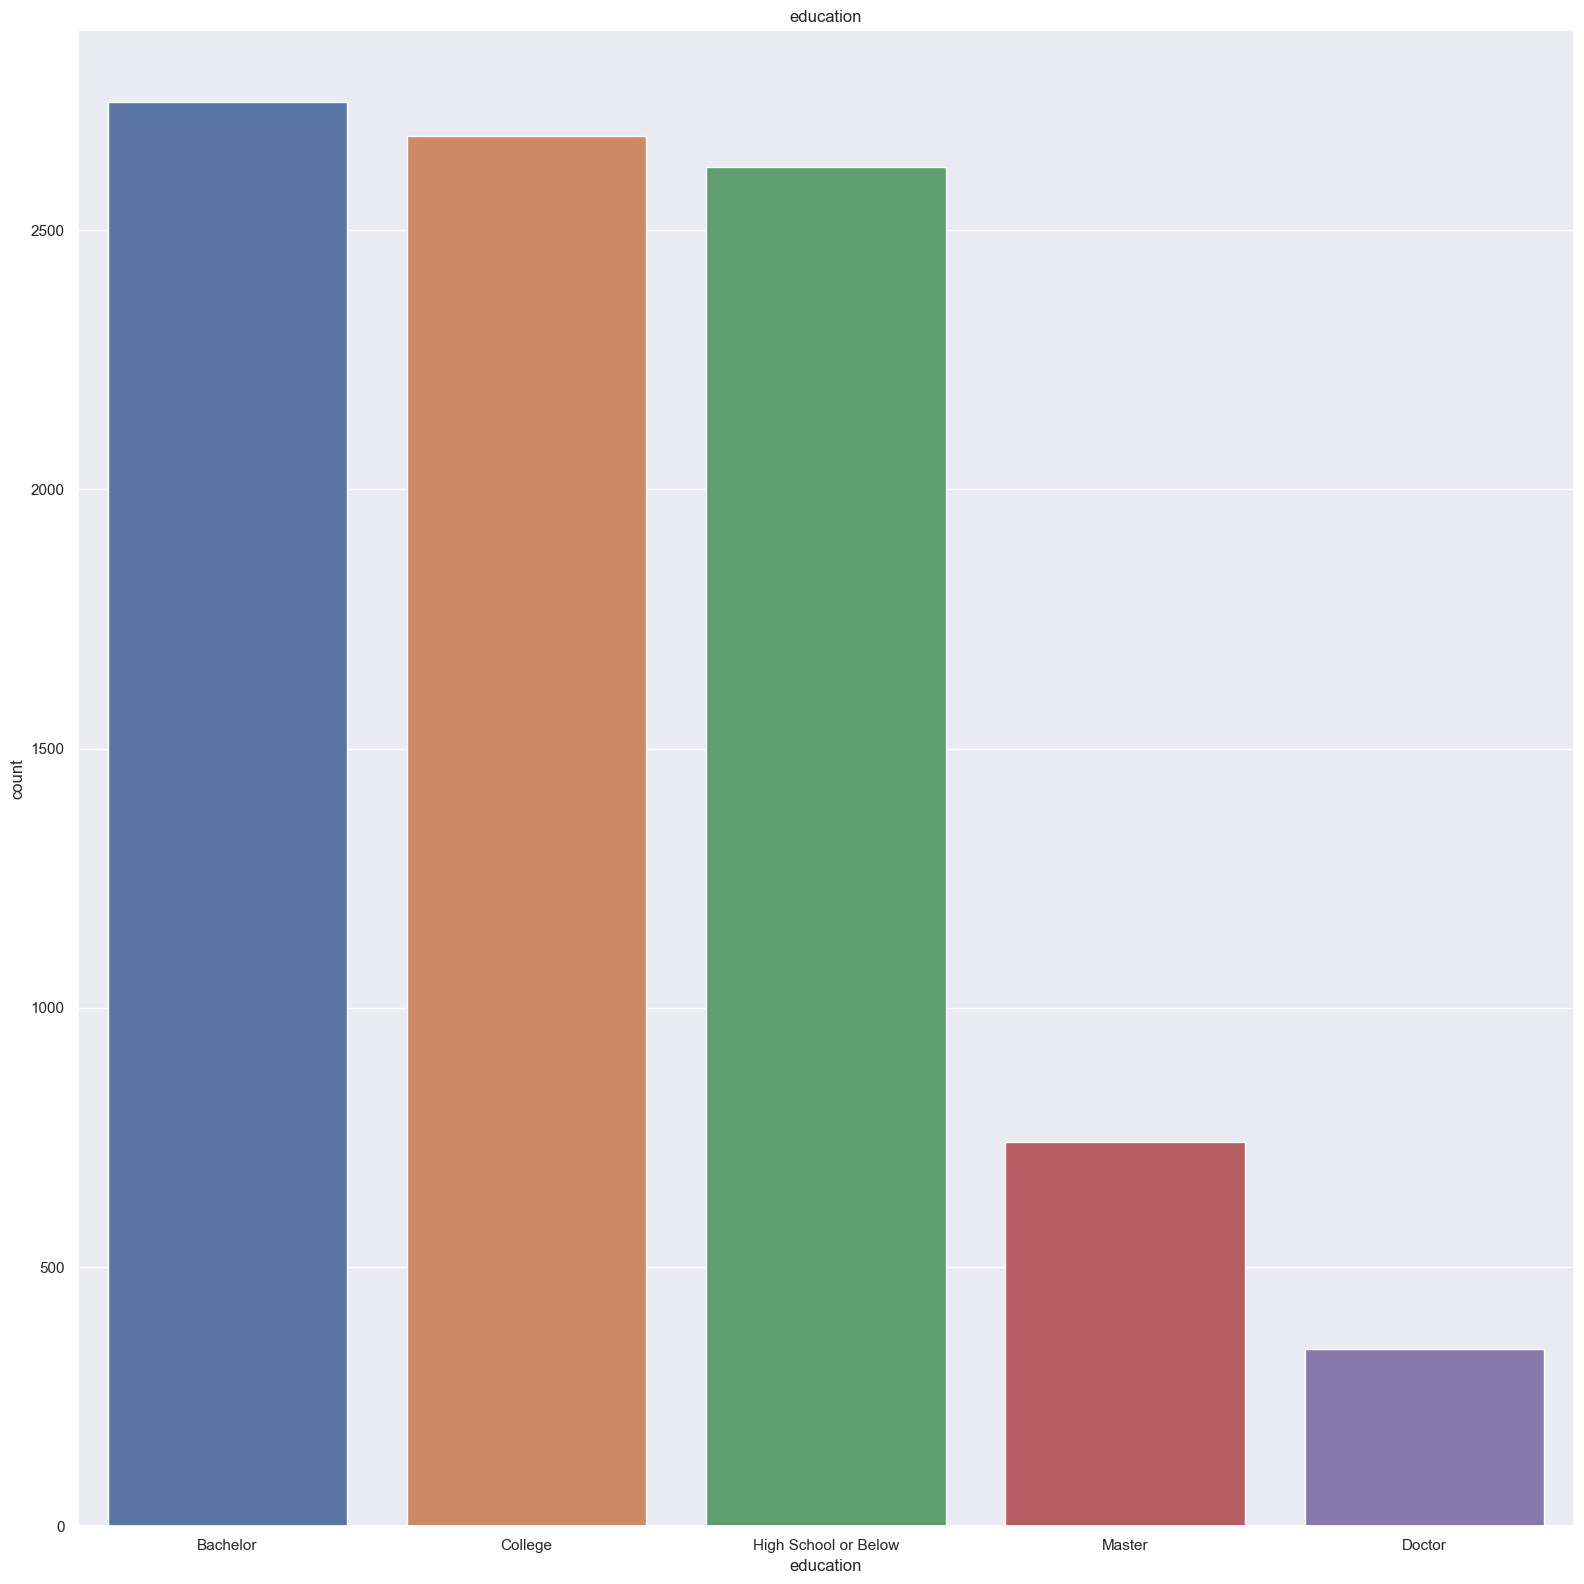

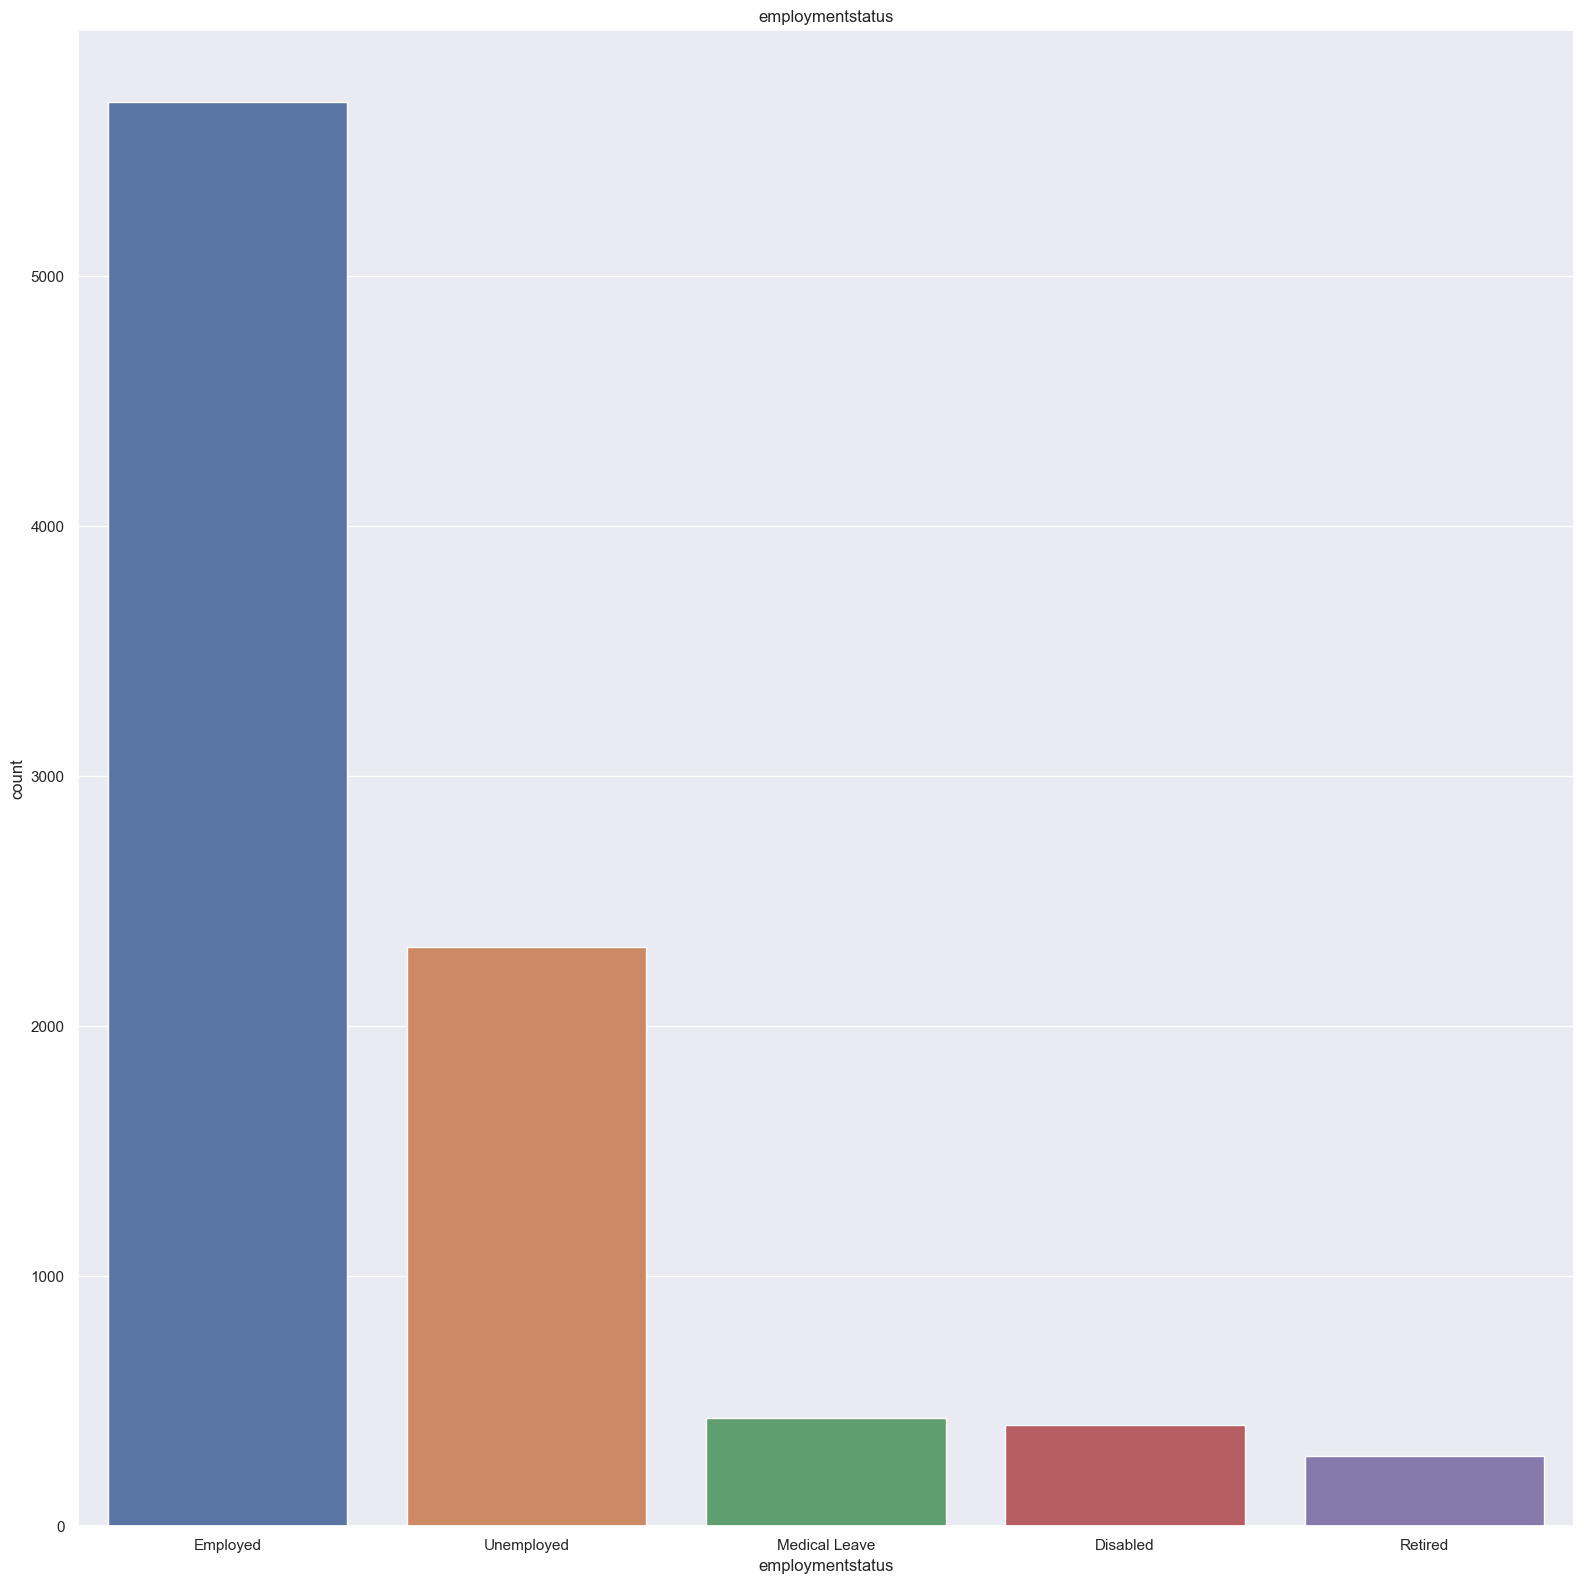

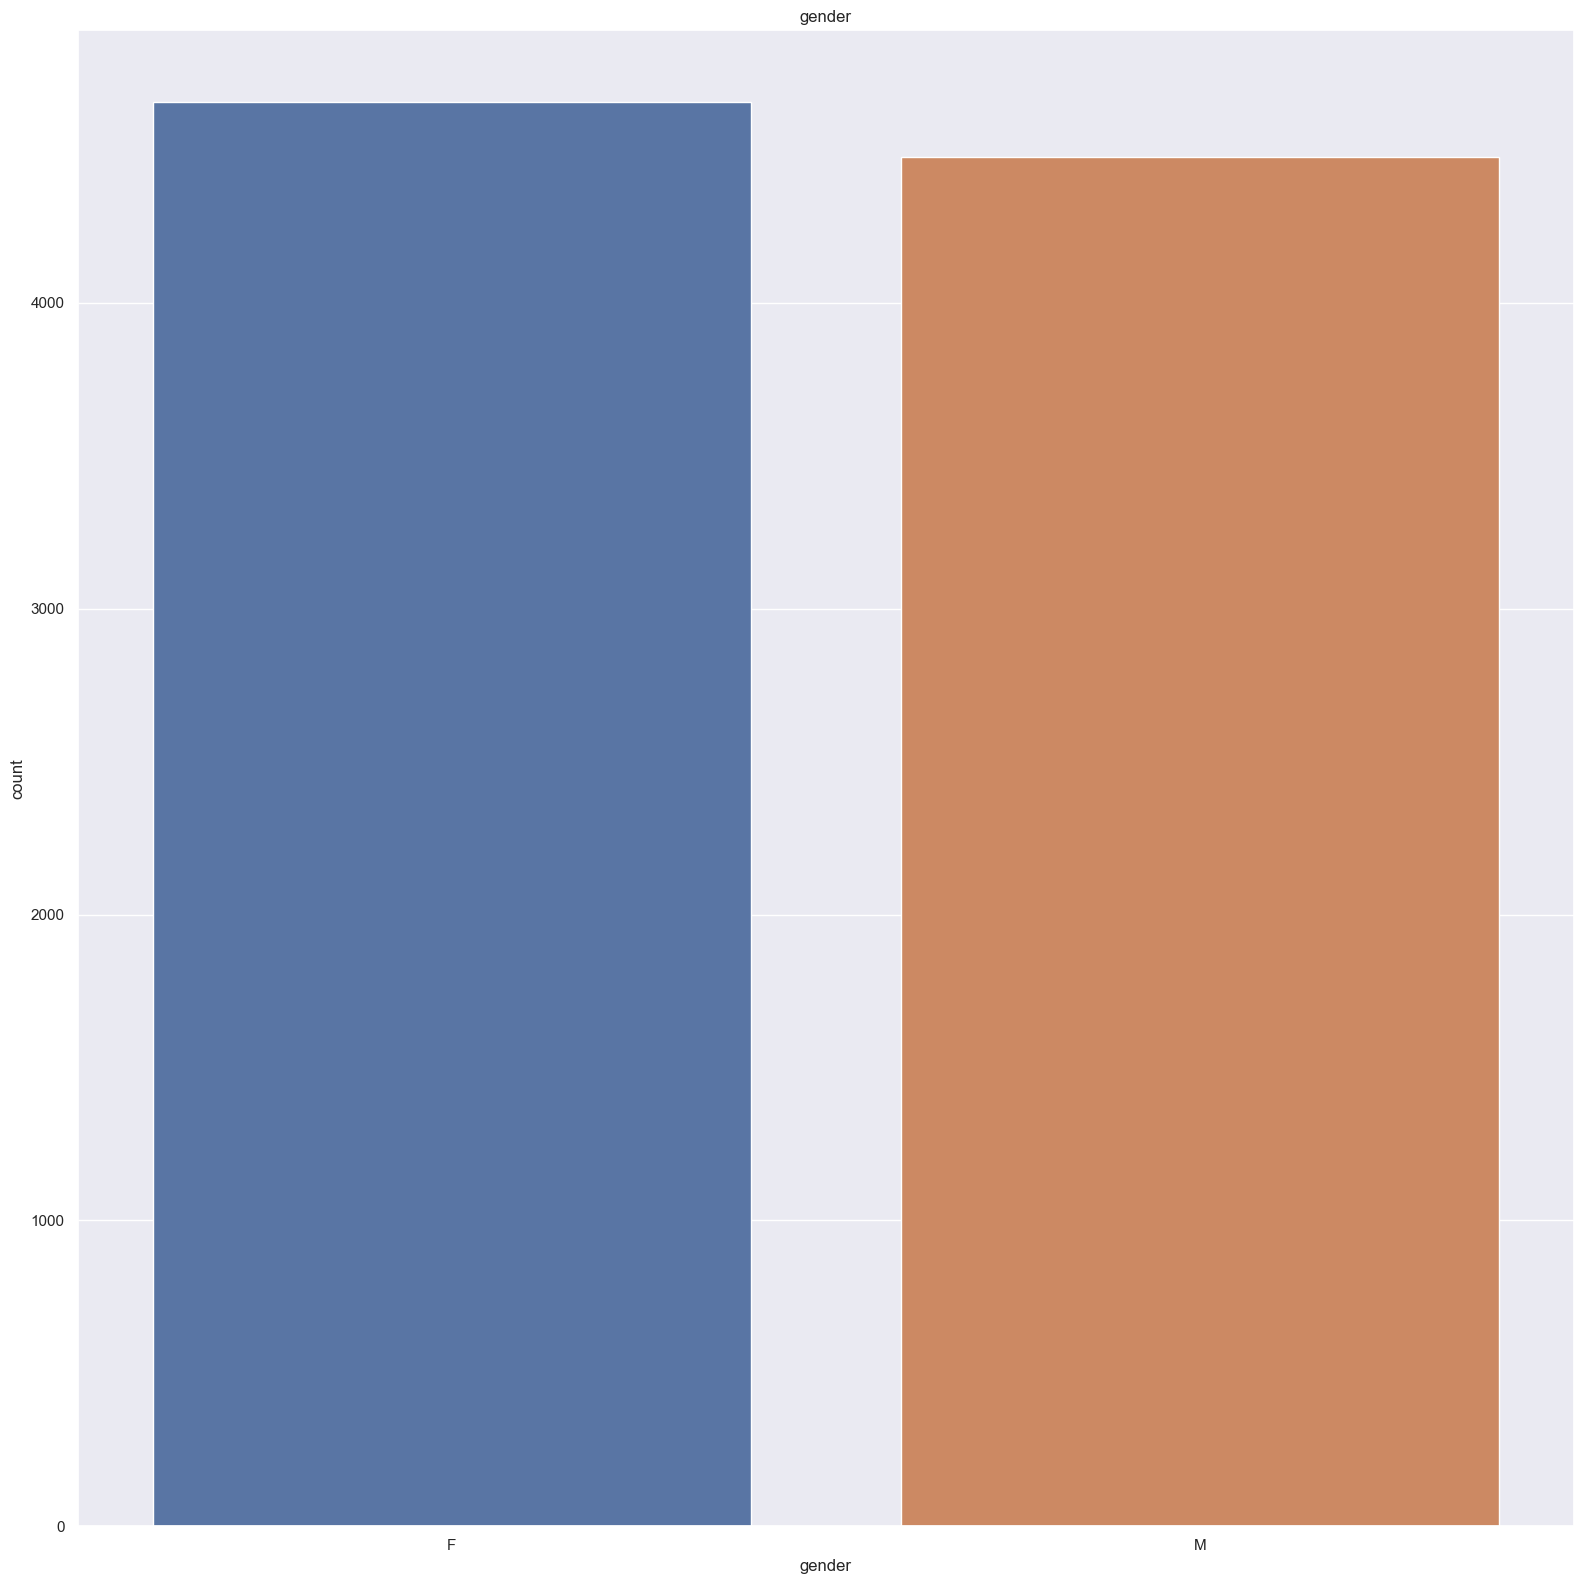

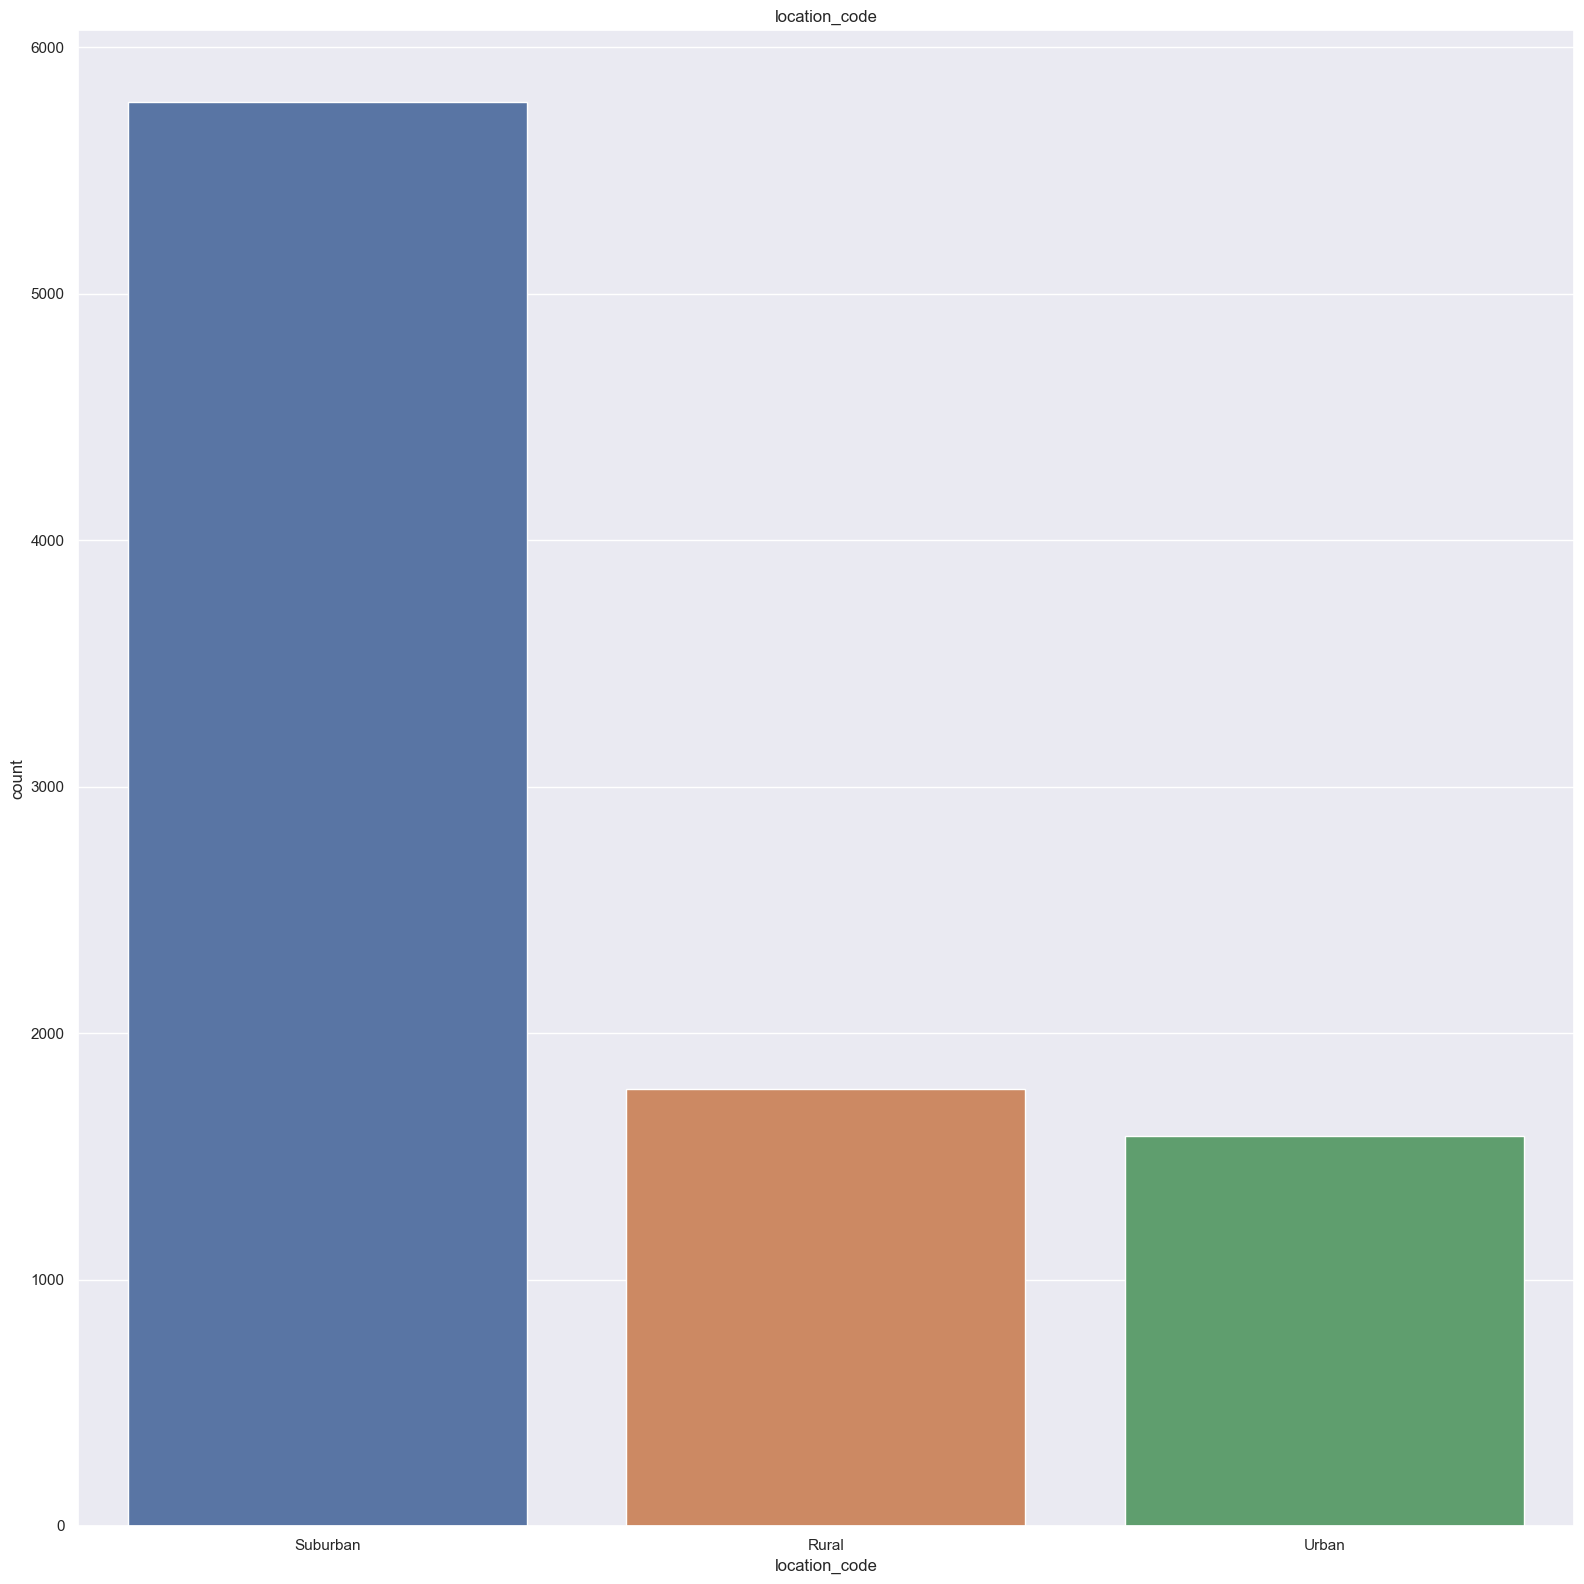

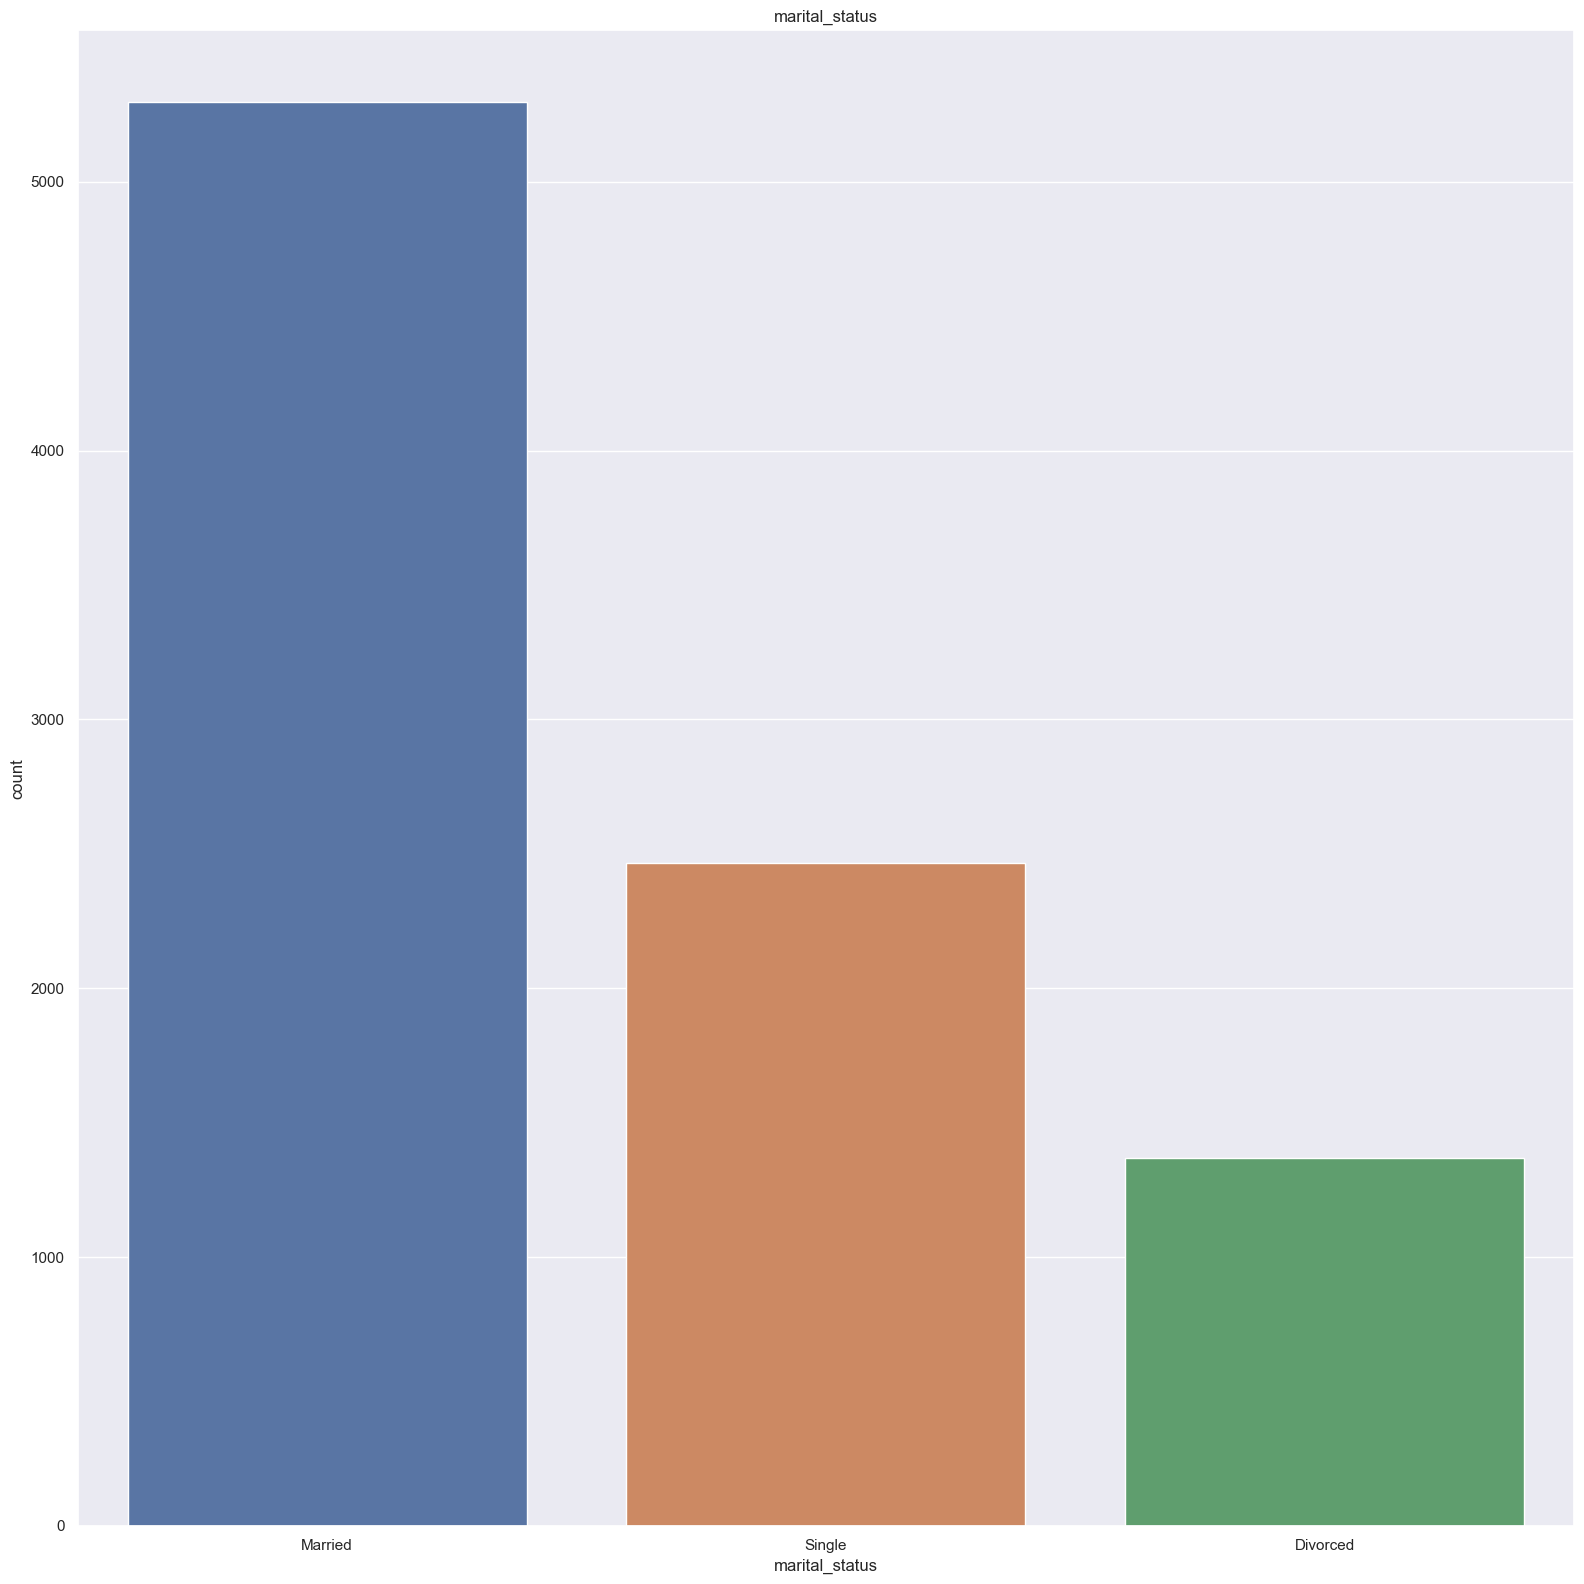

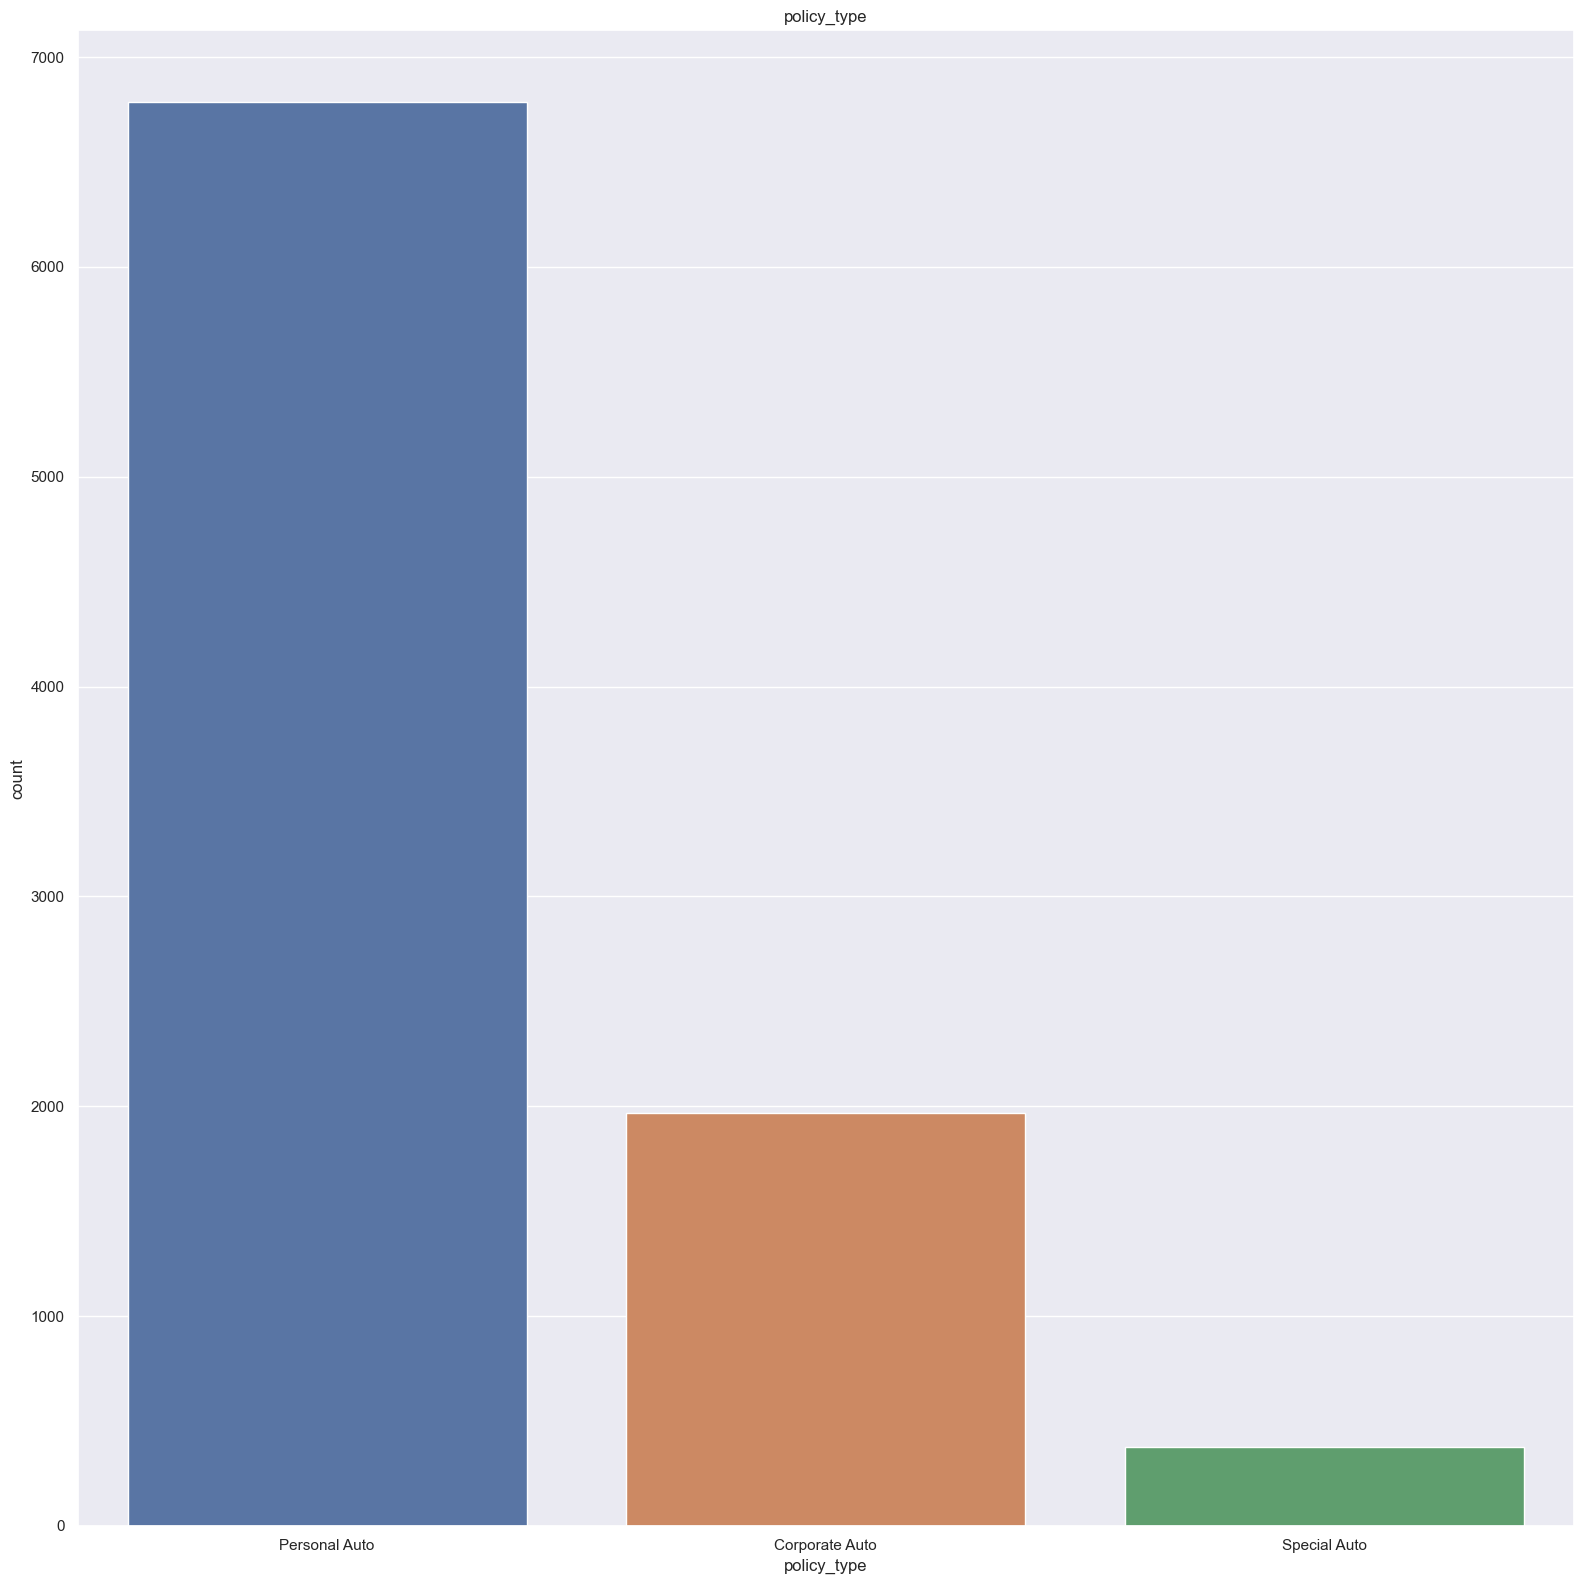

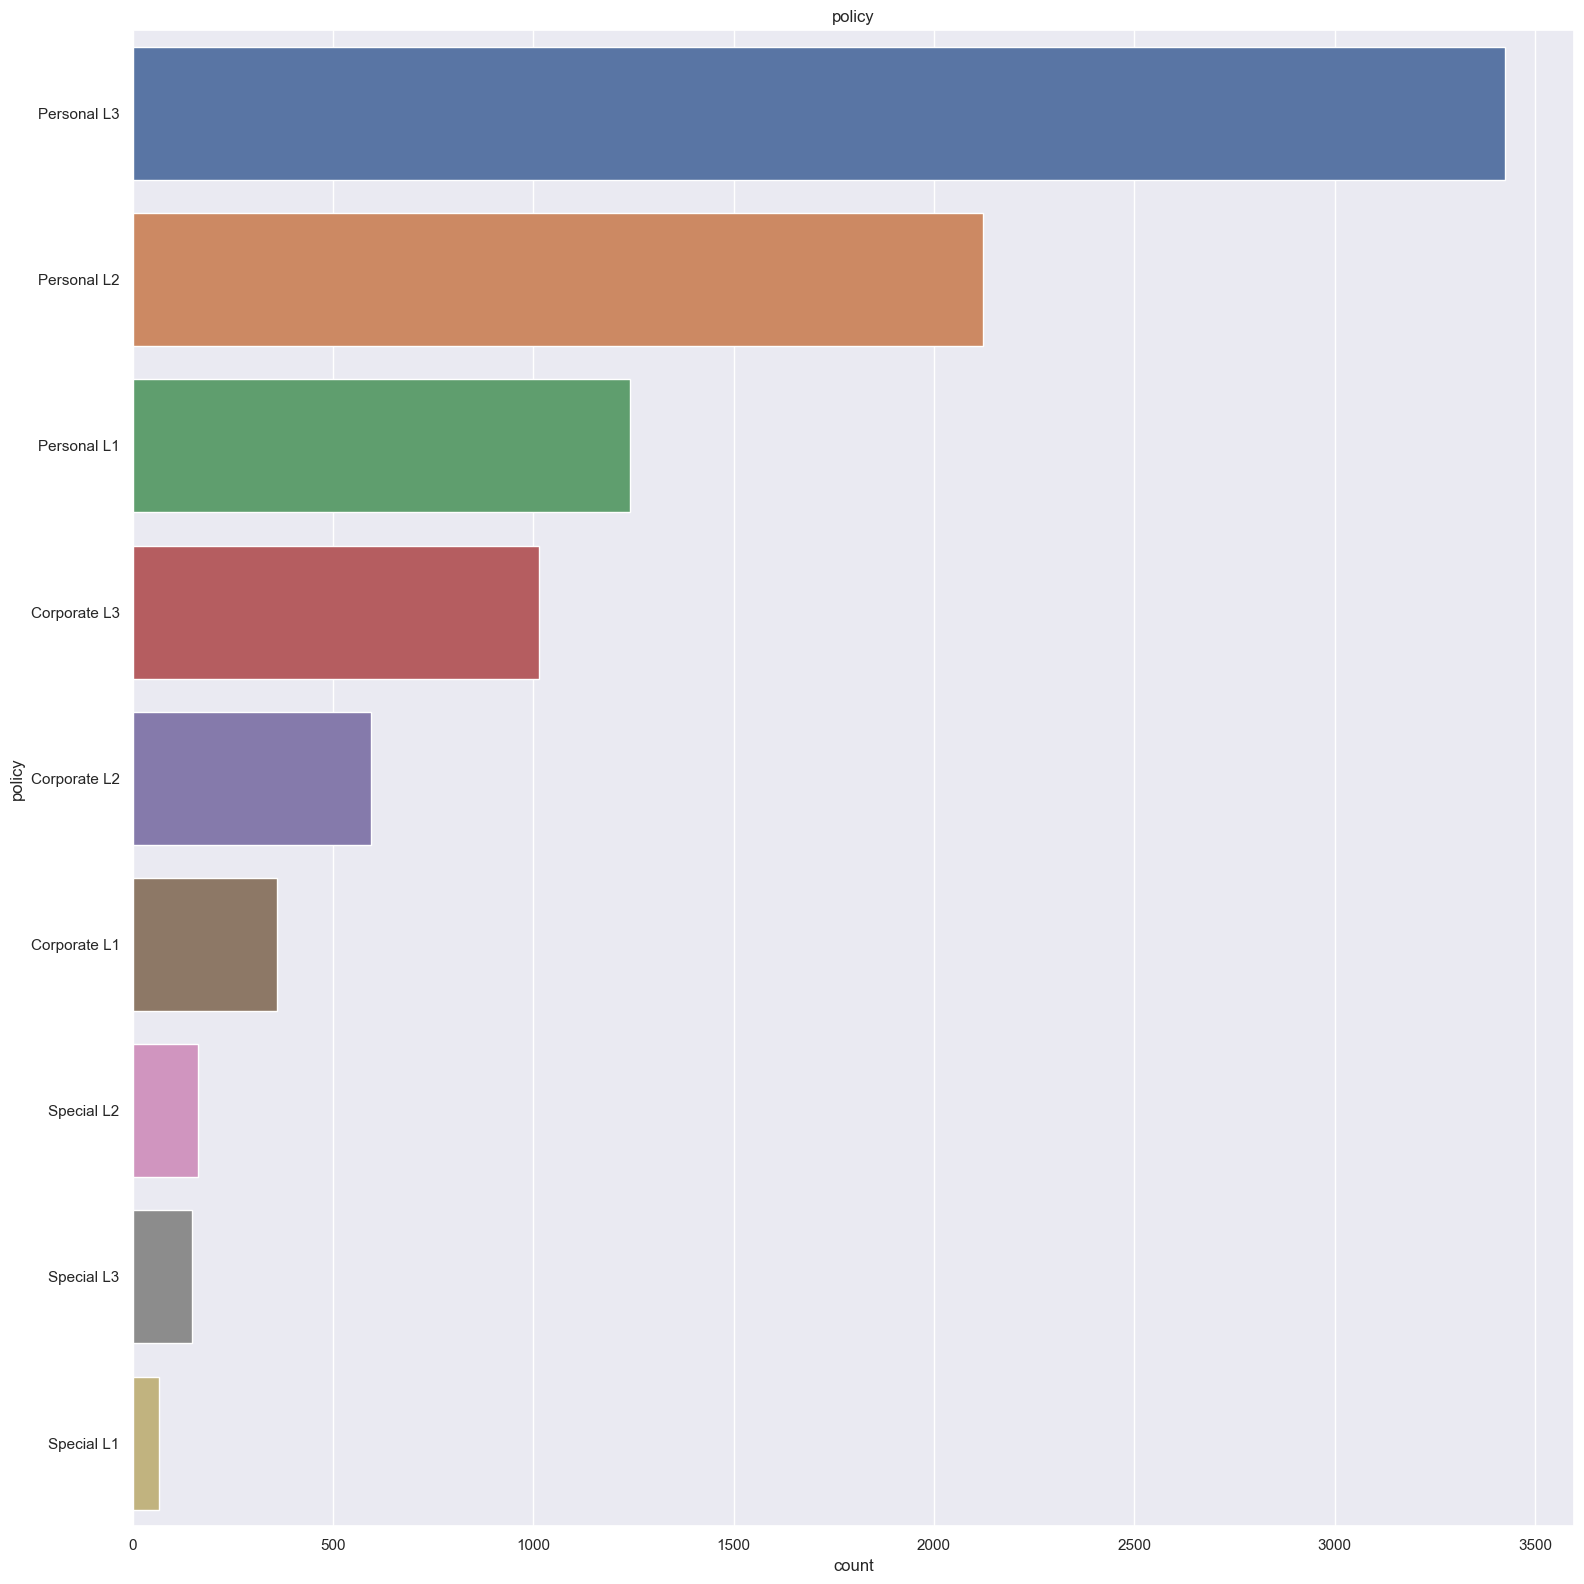

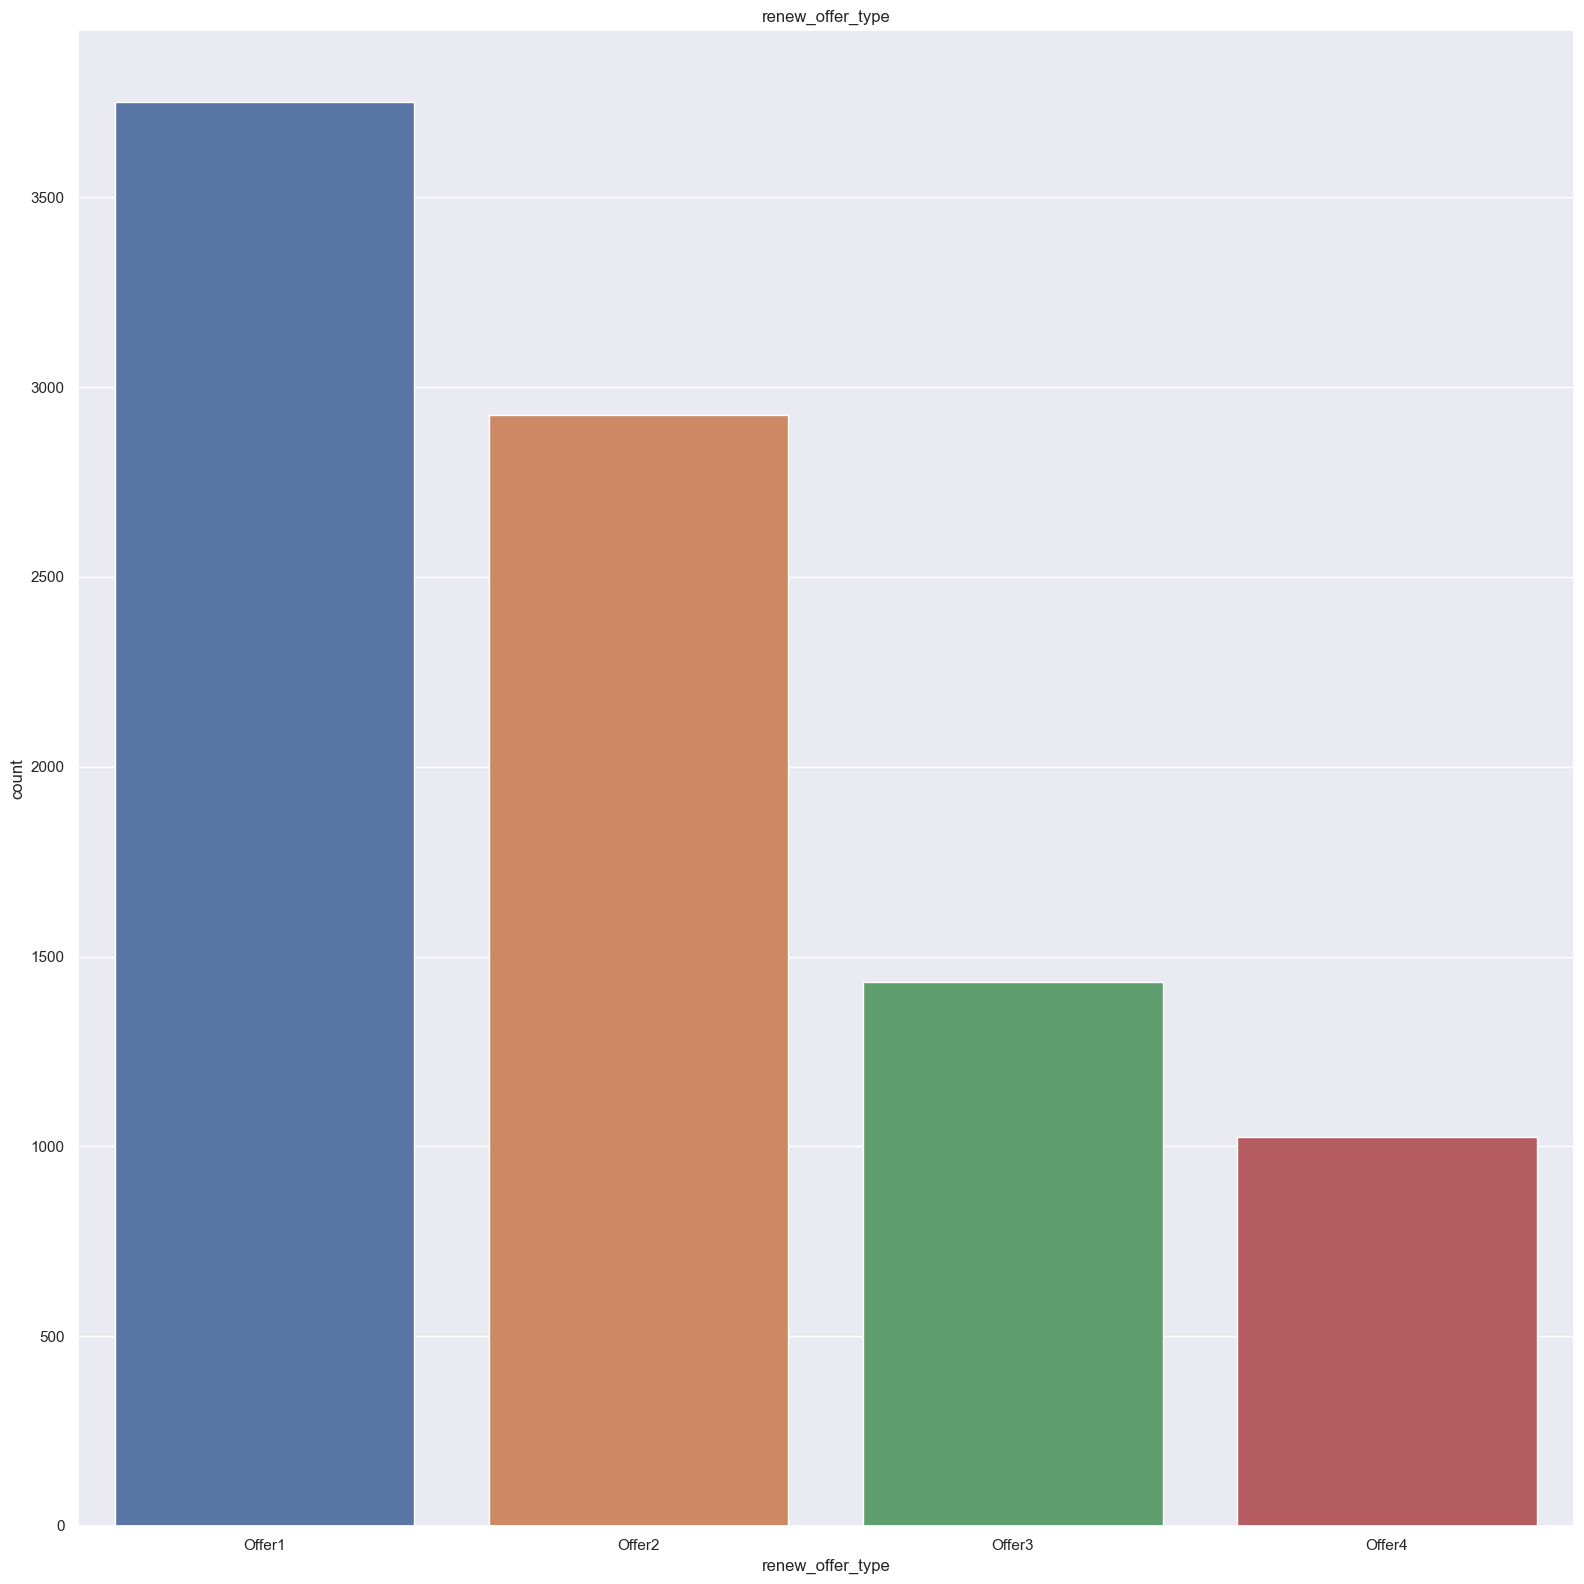

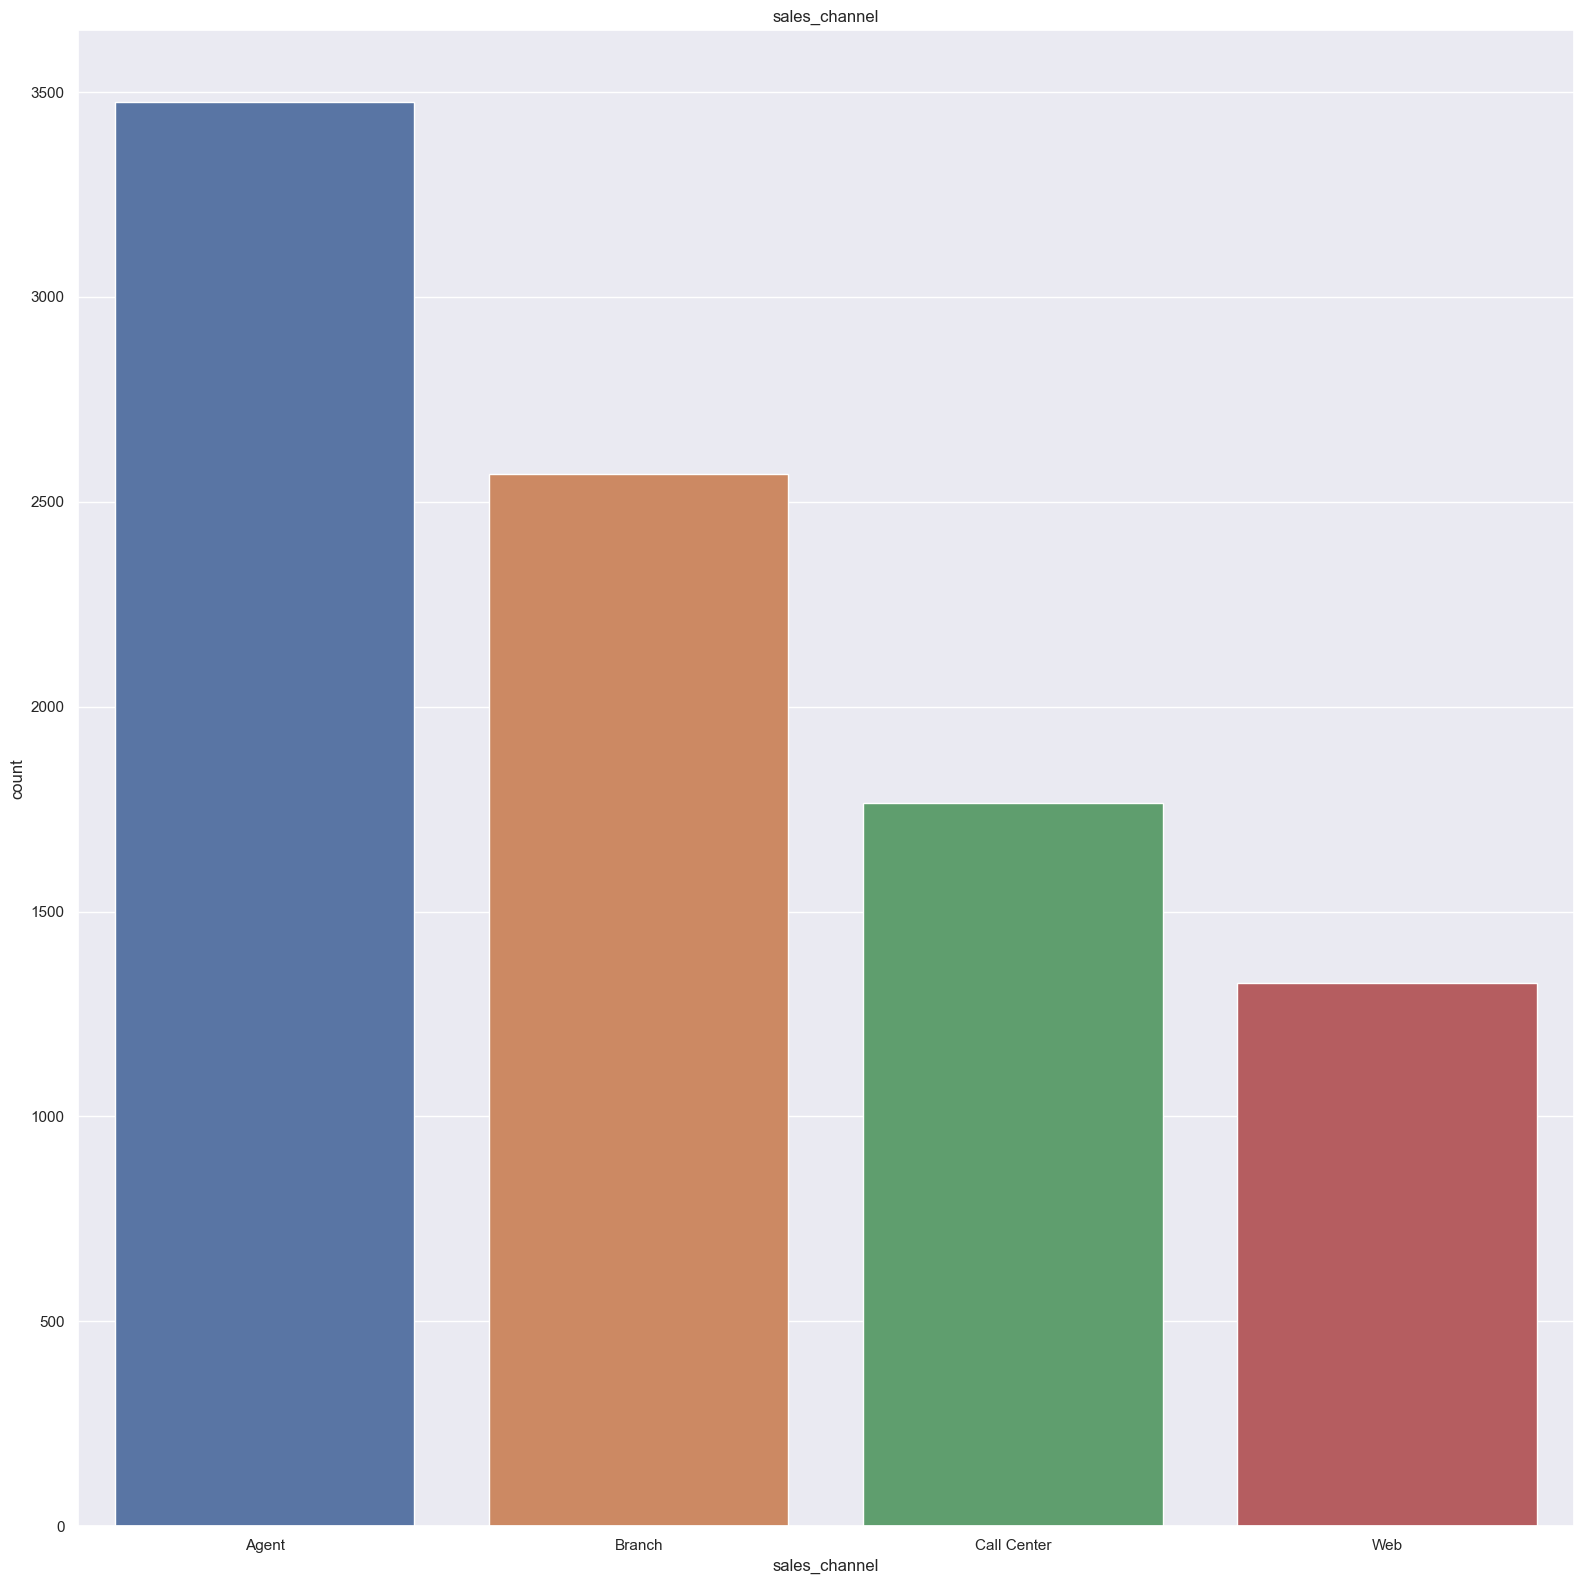

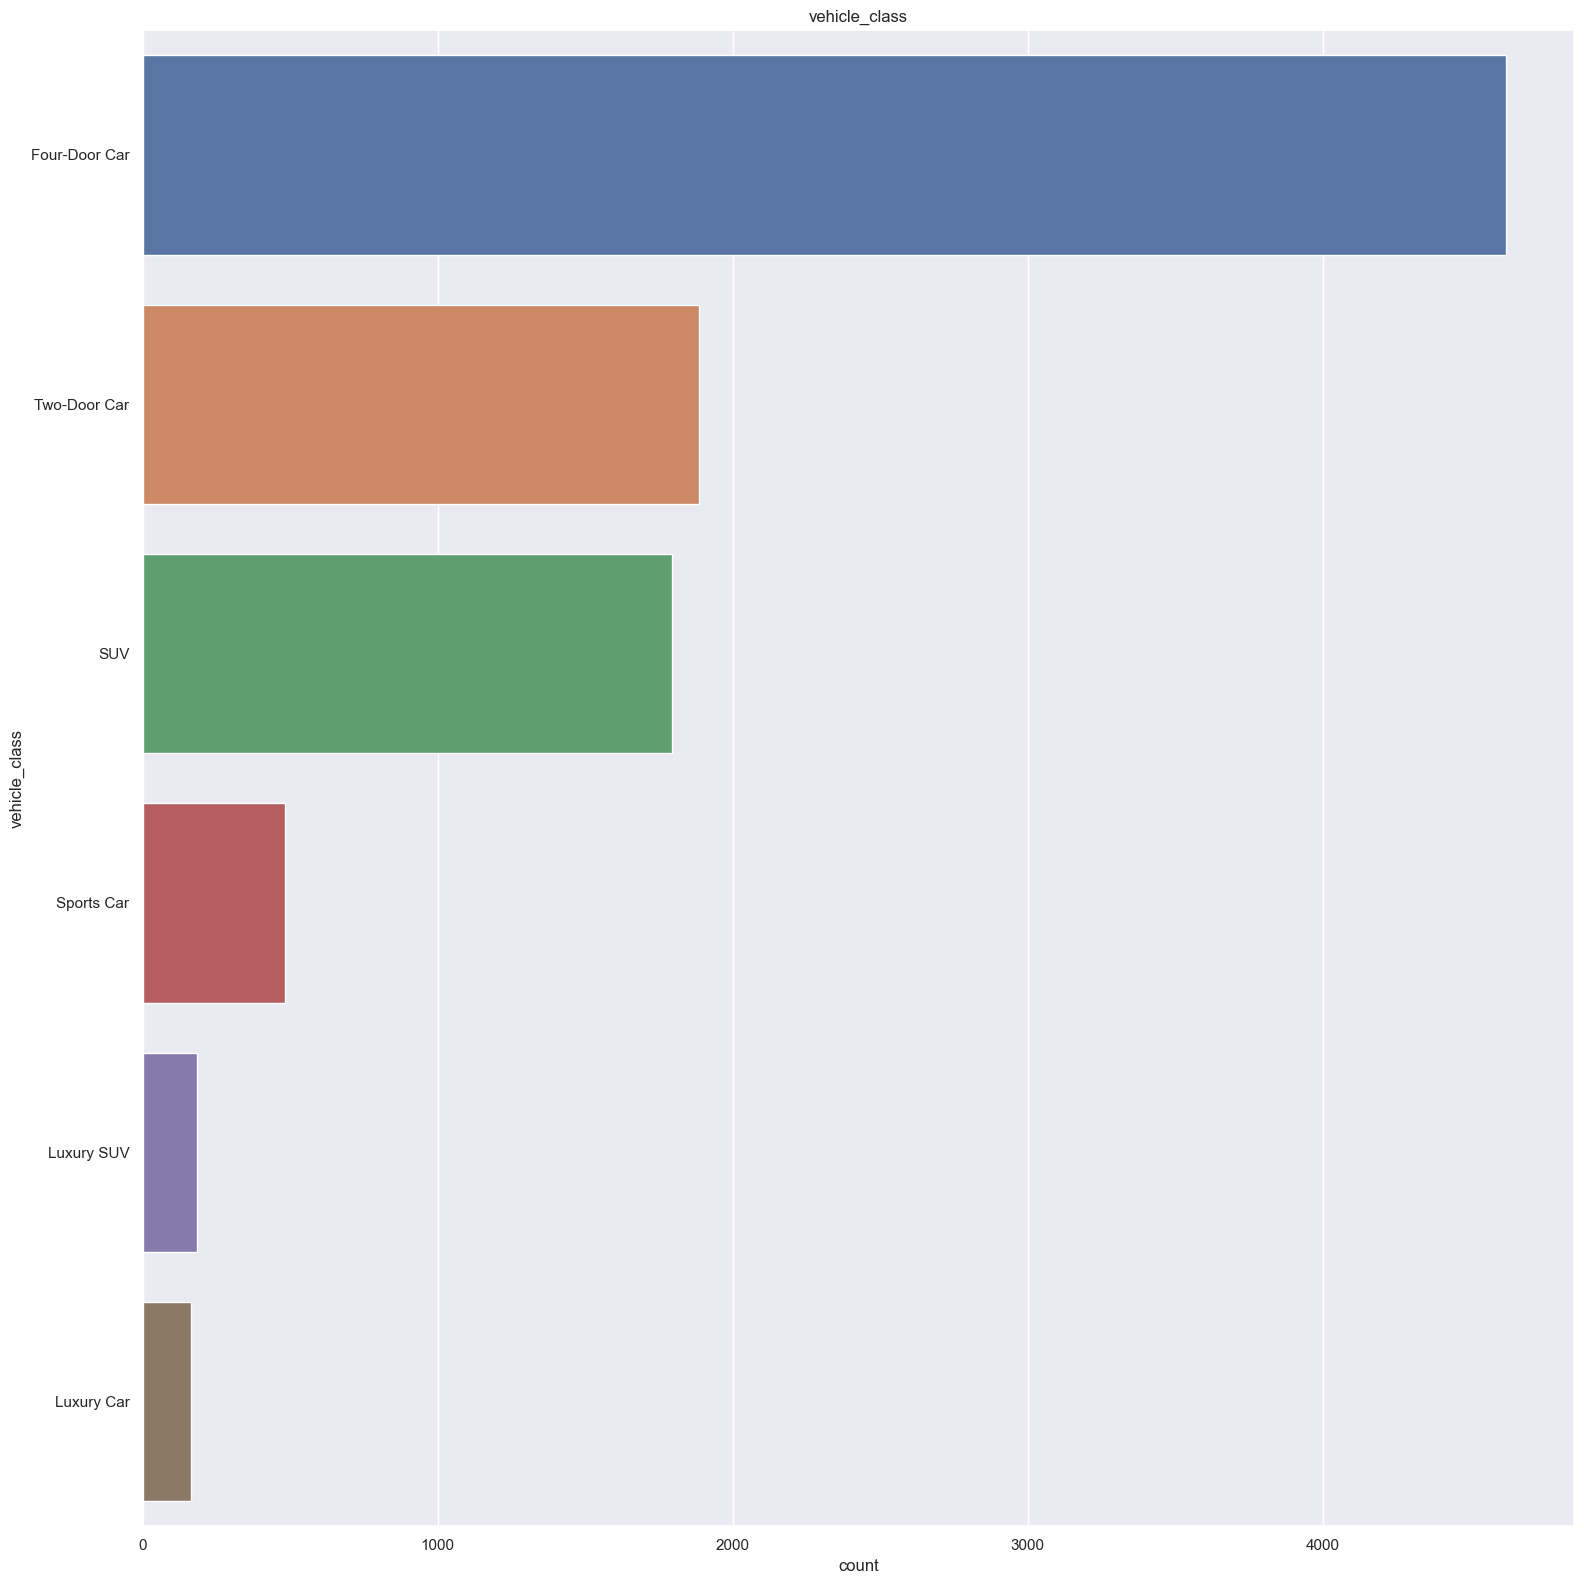

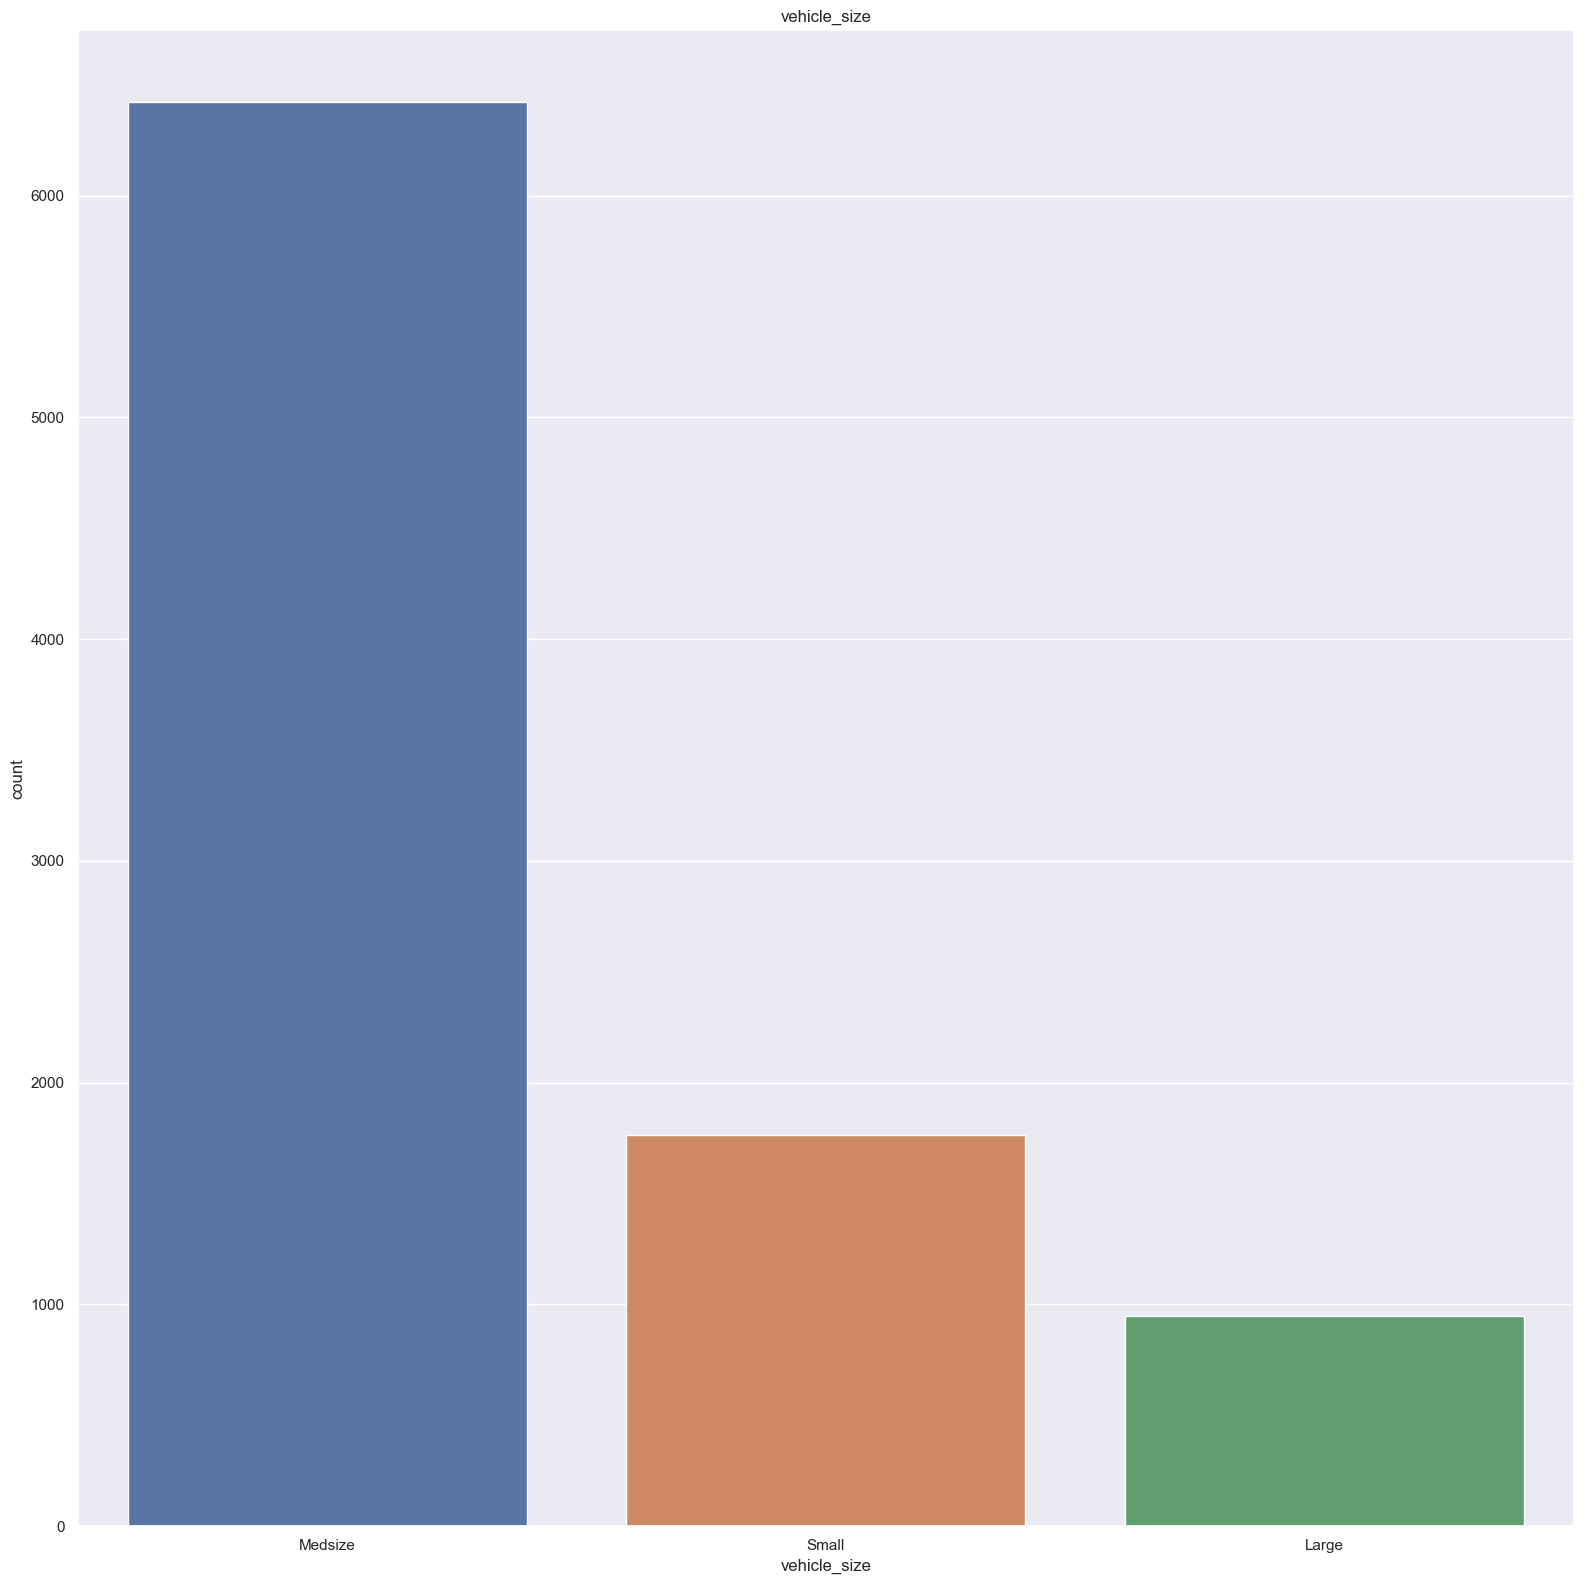

In [40]:
def countplot_categorical(dataframe: pd.DataFrame):
    '''
    Creates countplots for every column of a dataframe with categorical values.
    '''
    for column in dataframe.columns:
        fig,ax = plt.subplots(figsize=(16, 16))
        if dataframe[column].nunique()>=6:            
            sns.countplot(data=dataframe, y= column, order=dataframe[column].value_counts().index)
        else:
            sns.countplot(data=dataframe, x= column, order=dataframe[column].value_counts().index)
        plt.title(column)
        plt.tight_layout()
        plt.show()

countplot_categorical(customer_df_cat)

#### 2. policy_type and policy columns are redundant, and what's worse policy column has a lot of possible unique values (high cardinality) which will be problematic when they will be dummified with an OneHotEncoder because we will increase a lot the number of columns in the dataframe. Drop the column policy_type and transform the column policy to three possible values: L1, L2, and L3 using a function.

In [ ]:
customer_df_cat.drop('policy_type', axis=1, inplace=True)

In [57]:
def replace_policy(dataframe:pd.DataFrame, column: str, word: str):
    dataframe[column]=dataframe[column].str.replace(f'.*{word}.*', f'{word}', regex=True)
    return dataframe

replace_policy(customer_df_cat, 'policy', 'L3')
replace_policy(customer_df_cat, 'policy', 'L2')
replace_policy(customer_df_cat, 'policy', 'L1')
customer_df_cat['policy'].unique()

array(['L3', 'L2', 'L1'], dtype=object)

In [58]:
customer_df_cat.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,L1,Offer1,Agent,Four-Door Car,Medsize


#### 3. Time dependency analysis. Use a seaborn line plot using the column effective_to_date to see if total_claim_amount is bigger at some specific dates. Use a figsize=(10,10)

<Axes: xlabel='effective_to_date', ylabel='total_claim_amount'>

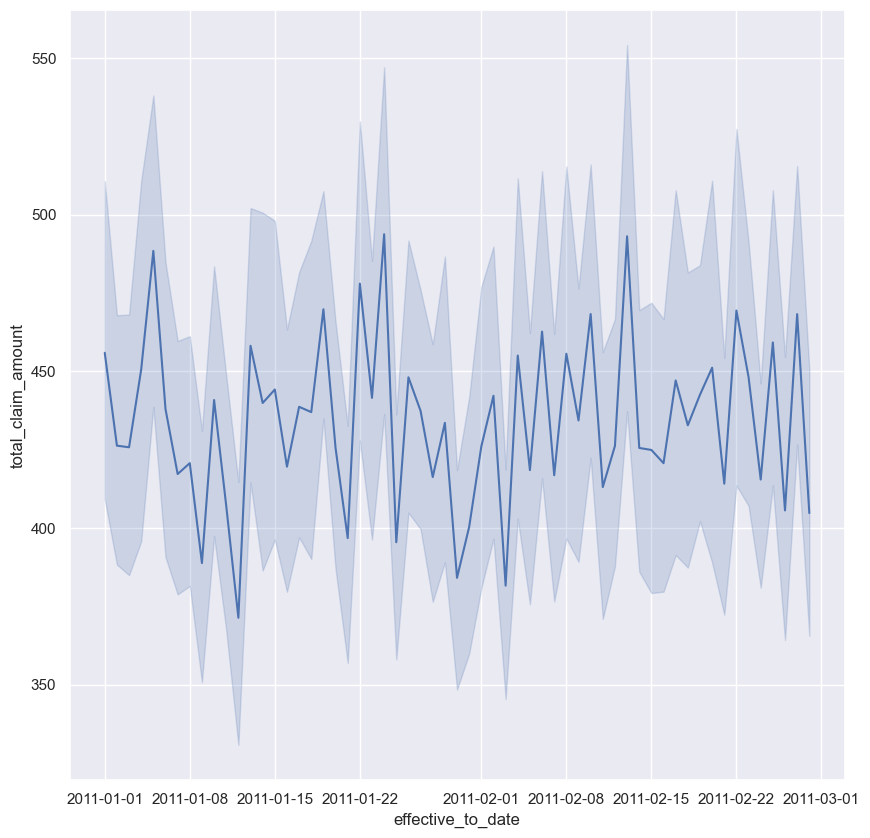

In [62]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=customer_df, x="effective_to_date", y= "total_claim_amount")

#### 4. To continue the analysis define an empty pandas DataFrame, and add the following new columns:

- day with the day number of effective_to_date:

In [71]:
new_df = pd.DataFrame()
new_df['day'] = customer_df['effective_to_date'].dt.day
new_df

,day
0,24
1,31
2,19
3,20
4,3
...,...
9129,10
9130,12
9131,6
9132,3


- day_name with the day NAME of effective_to_date:

In [72]:
new_df['day_name'] = customer_df['effective_to_date'].dt.day_name()
new_df

,day,day_name
0,24,Thursday
1,31,Monday
2,19,Saturday
3,20,Thursday
4,3,Thursday
...,...,...
9129,10,Thursday
9130,12,Saturday
9131,6,Sunday
9132,3,Thursday


- week with the week of effective_to_date:

In [73]:
new_df['week'] = customer_df['effective_to_date'].dt.isocalendar().week
new_df

,day,day_name,week
0,24,Thursday,8
1,31,Monday,5
2,19,Saturday,7
3,20,Thursday,3
4,3,Thursday,5
...,...,...,...
9129,10,Thursday,6
9130,12,Saturday,6
9131,6,Sunday,5
9132,3,Thursday,5


- month with the month NAME of effective_to_date:

In [75]:
new_df['month'] = customer_df['effective_to_date'].dt.month_name()
new_df

,day,day_name,week,month
0,24,Thursday,8,February
1,31,Monday,5,January
2,19,Saturday,7,February
3,20,Thursday,3,January
4,3,Thursday,5,February
...,...,...,...,...
9129,10,Thursday,6,February
9130,12,Saturday,6,February
9131,6,Sunday,5,February
9132,3,Thursday,5,February


- total_claim_amount with total_claim_amount:

In [76]:
new_df['total_claim_amount'] = customer_df['total_claim_amount']
new_df

,day,day_name,week,month,total_claim_amount
0,24,Thursday,8,February,384.811147
1,31,Monday,5,January,1131.464935
2,19,Saturday,7,February,566.472247
3,20,Thursday,3,January,529.881344
4,3,Thursday,5,February,138.130879
...,...,...,...,...,...
9129,10,Thursday,6,February,198.234764
9130,12,Saturday,6,February,379.200000
9131,6,Sunday,5,February,790.784983
9132,3,Thursday,5,February,691.200000


#### 5. Compute the total target column aggregated day_name rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_days)

In [89]:
list_of_correct_days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
new_df_groupby=new_df.groupby('day_name')['total_claim_amount'].agg(lambda x: round(x.sum(), 2)).reindex(index=list_of_correct_days).reset_index()
new_df_groupby

,day_name,total_claim_amount
0,Monday,655689.71
1,Tuesday,502518.93
2,Wednesday,541563.05
3,Thursday,541820.80
4,Friday,533658.79
5,Saturday,608060.10
6,Sunday,581655.66


#### 6. Use a seaborn line plot to plot the previous series. Do you see some differences by day of the week?

<Axes: xlabel='day_name', ylabel='total_claim_amount'>

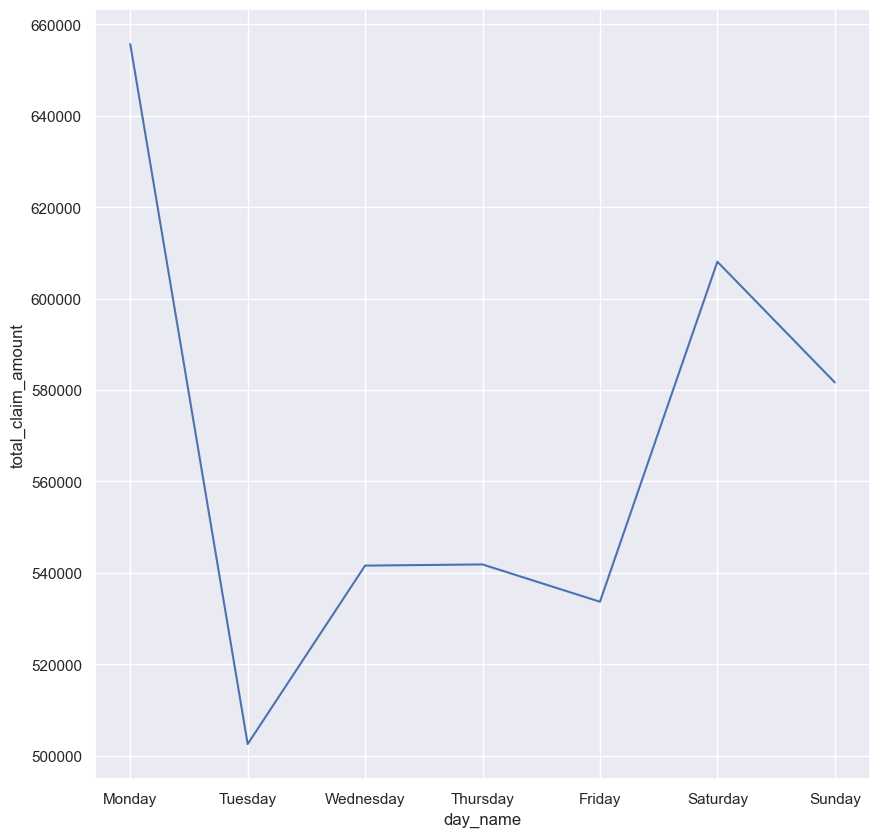

In [90]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=new_df_groupby, x="day_name", y= "total_claim_amount")

Answer: We can clearly see some differences:
- we can see a higher values from "total_claim_amount" on Monday and Saturday;
- the lowest are on Tuesday and Friday;

#### 7. Get the total number of claims by day of the week name and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [92]:
new_df_groupby_count=new_df.groupby('day_name')['total_claim_amount'].agg('count').reindex(index=list_of_correct_days).reset_index()
new_df_groupby_count

,day_name,total_claim_amount
0,Monday,1530
1,Tuesday,1162
2,Wednesday,1221
3,Thursday,1249
4,Friday,1245
5,Saturday,1397
6,Sunday,1330


#### 8. Get the median "target" by day of the week name and then sort the resulting values in descending order using .sort_values()

In [96]:
new_df_groupby_median=new_df.groupby('day_name')['total_claim_amount'].agg('median').sort_values(ascending=False).reset_index()
new_df_groupby_median

,day_name,total_claim_amount
0,Thursday,395.328407
1,Wednesday,392.235698
2,Monday,385.735705
3,Sunday,383.721164
4,Saturday,379.200000
5,Tuesday,378.490829
6,Friday,371.803029


#### 9. Plot the median "target" by day of the week name using a seaborn barplot

<Axes: xlabel='day_name', ylabel='total_claim_amount'>

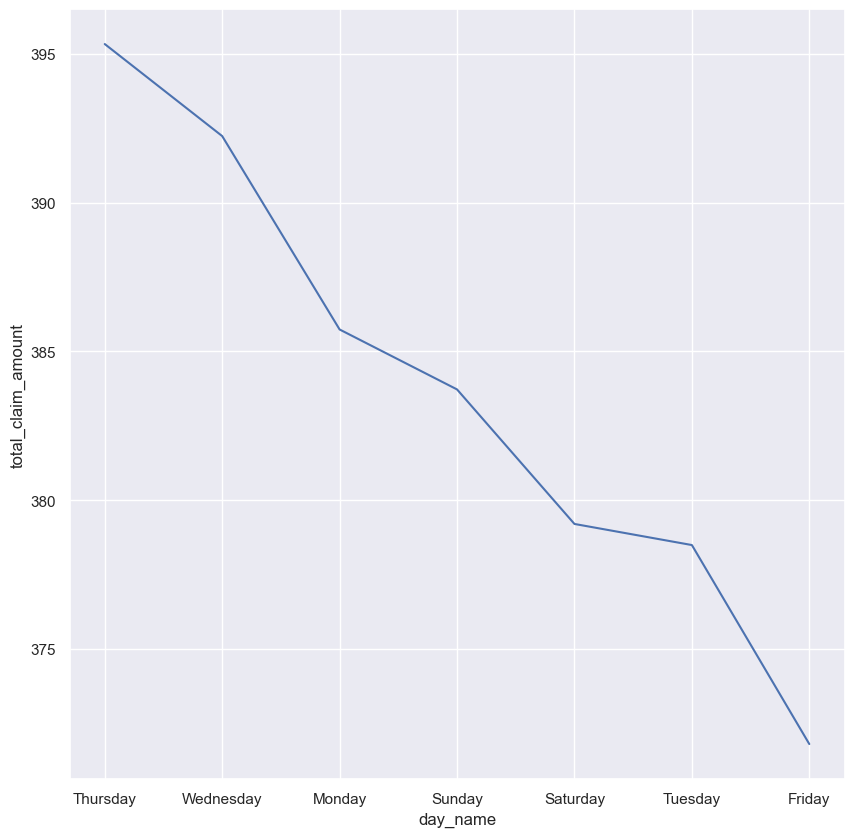

In [97]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.lineplot(data=new_df_groupby_median, x="day_name", y= "total_claim_amount")

#### 10. What can you conclude from this analysis?

We can see that:
- the day with highest median target is Thursday;
- the day with lowest median target is Friday;
- the days with the highest total target are not the same as the ones with the highest median which suggests some days can have less number of claim amounts but with a higher value amount and vice-versa.

#### 11. Compute the total target column aggregated month rounded to two decimals and then reorder the index of the resulting pandas series using .reindex(index=list_of_correct_values)

In [101]:
list_of_correct_values = ['January', 'February']
new_df_groupby_month_total=new_df.groupby('month')['total_claim_amount'].agg(lambda x: round(x.sum(), 2)).reindex(index=list_of_correct_values).reset_index()
new_df_groupby_month_total

,month,total_claim_amount
0,January,2117142.86
1,February,1847824.19


#### 12. Can you do a monthly analysis given the output of the previous series? Why?

Answer: There wouldn't be a very clarifying analysis given that we only have 2 months to work with, being a very small sample size.

#### 13. Define a function to remove the outliers of a numerical continuous column depending if a value is bigger or smaller than a given amount of standard deviations of the mean (thr=3).

In [110]:
def filter_outliers(dataframe:pd.DataFrame, column:str, thr=3)-> pd.DataFrame:
    '''
    Takes a dataframe and a column
    '''
    lower_limit = np.mean(dataframe[column]) - thr * np.std(dataframe[column])
    upper_limit = np.mean(dataframe[column]) + thr * np.std(dataframe[column])
    dataframe_no_outliers = dataframe[(dataframe[column]>lower_limit) & (dataframe[column]<upper_limit)]
    return dataframe_no_outliers

#### 14. Use the previous function to remove the outliers of continuous data and to generate a continuous_clean_df.

In [174]:
customer_df_num_con

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [175]:
for column in customer_df_num_con.columns:
    continuous_clean_df=filter_outliers(customer_df_num_con, column, thr=3)

continuous_clean_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


#### 15. Concatenate the continuous_cleaned_df, discrete_df, categorical_df, and the relevant column of time_df. After removing outliers the continuous_cleaned dataframe will have fewer rows (when you concat the individual dataframes using pd.concat()) the resulting dataframe will have NaN's because of the different sizes of each dataframe. Use pd.dropna() and .reset_index() to fix the final dataframe.

In [177]:
df_concat = pd.concat([continuous_clean_df, customer_df_num_dis, customer_df_cat, new_df], axis=1)
df_concat_clean = df_concat.dropna().reset_index().drop("index", axis=1)
#since, after concatenating, the column "total_claim_amount is duplicated i decided to drop one of them (the last one)"
df_concat_clean = df_concat_clean.loc[:, ~df_concat_clean.columns.duplicated()]
df_concat_clean

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,...,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month
0,2763.519279,56274.0,69.0,5.0,384.811147,32,0,1,Washington,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February
1,6979.535903,0.0,94.0,42.0,1131.464935,13,0,8,Arizona,No,...,Single,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January
2,12887.431650,48767.0,108.0,38.0,566.472247,18,0,2,Nevada,No,...,Married,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February
3,7645.861827,0.0,106.0,65.0,529.881344,18,0,7,California,No,...,Married,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January
4,2813.692575,43836.0,73.0,44.0,138.130879,12,0,1,Washington,No,...,Single,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,198.234764,18,0,2,California,No,...,Married,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,February
8972,3096.511217,21604.0,79.0,28.0,379.200000,14,0,1,California,Yes,...,Divorced,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,February
8973,8163.890428,0.0,85.0,37.0,790.784983,9,3,2,California,No,...,Single,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February
8974,7524.442436,21941.0,96.0,3.0,691.200000,34,0,3,California,No,...,Married,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February


#### 16. Reorder the columns of the dataframe to place 'total_claim_amount' as the last column.

In [179]:
column_to_move = df_concat_clean["total_claim_amount"]
df_concat_clean.drop("total_claim_amount", axis=1, inplace=True)

In [180]:
df_concat_clean = pd.concat([df_concat_clean, column_to_move], axis=1)
df_concat_clean

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,No,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,No,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,No,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,No,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,No,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,18,0,2,California,No,Basic,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,February,198.234764
8972,3096.511217,21604.0,79.0,28.0,14,0,1,California,Yes,Extended,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,February,379.200000
8973,8163.890428,0.0,85.0,37.0,9,3,2,California,No,Extended,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February,790.784983
8974,7524.442436,21941.0,96.0,3.0,34,0,3,California,No,Extended,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February,691.200000


#### 17. Turn the response column values into (Yes=1/No=0).

In [181]:
df_concat_clean['response'] = df_concat_clean['response'].replace({'Yes': 1, 'No': 0})
df_concat_clean

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,months_since_last_claim,number_of_open_complaints,number_of_policies,state,response,coverage,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,day,day_name,week,month,total_claim_amount
0,2763.519279,56274.0,69.0,5.0,32,0,1,Washington,0,Basic,...,L3,Offer1,Agent,Two-Door Car,Medsize,24,Thursday,8,February,384.811147
1,6979.535903,0.0,94.0,42.0,13,0,8,Arizona,0,Extended,...,L3,Offer3,Agent,Four-Door Car,Medsize,31,Monday,5,January,1131.464935
2,12887.431650,48767.0,108.0,38.0,18,0,2,Nevada,0,Premium,...,L3,Offer1,Agent,Two-Door Car,Medsize,19,Saturday,7,February,566.472247
3,7645.861827,0.0,106.0,65.0,18,0,7,California,0,Basic,...,L2,Offer1,Call Center,SUV,Medsize,20,Thursday,3,January,529.881344
4,2813.692575,43836.0,73.0,44.0,12,0,1,Washington,0,Basic,...,L1,Offer1,Agent,Four-Door Car,Medsize,3,Thursday,5,February,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8971,23405.987980,71941.0,73.0,89.0,18,0,2,California,0,Basic,...,L1,Offer2,Web,Four-Door Car,Medsize,10,Thursday,6,February,198.234764
8972,3096.511217,21604.0,79.0,28.0,14,0,1,California,1,Extended,...,L3,Offer1,Branch,Four-Door Car,Medsize,12,Saturday,6,February,379.200000
8973,8163.890428,0.0,85.0,37.0,9,3,2,California,0,Extended,...,L2,Offer1,Branch,Four-Door Car,Medsize,6,Sunday,5,February,790.784983
8974,7524.442436,21941.0,96.0,3.0,34,0,3,California,0,Extended,...,L2,Offer3,Branch,Four-Door Car,Large,3,Thursday,5,February,691.200000


#### 18. Reduce the class imbalance in education by grouping together ["Master","Doctor"] into "Graduate" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [182]:
df_concat_clean['education'] = df_concat_clean['education'].replace({'Master': "Graduate", "Doctor": "Graduate"})
df_concat_clean['education'].value_counts()

Bachelor                2704
College                 2639
High School or Below    2554
Graduate                1079
Name: education, dtype: int64

#### 19. Reduce the class imbalance of the employmentstatus column grouping together ["Medical Leave", "Disabled", "Retired"] into "Inactive" while keeping the other possible values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [183]:
df_concat_clean['employmentstatus'] = df_concat_clean['employmentstatus'].replace({"Medical Leave": "Inactive", "Disabled": "Inactive", "Retired": "Inactive"})
df_concat_clean['employmentstatus'].value_counts()

Employed      5651
Unemployed    2216
Inactive      1109
Name: employmentstatus, dtype: int64

#### 20. Deal with column Gender turning the values into (1/0).

In [184]:
df_concat_clean['gender'] = df_concat_clean['gender'].replace({'F': 1, 'M': 0})
df_concat_clean['gender'].value_counts()

1    4600
0    4376
Name: gender, dtype: int64

#### 21. Now, deal with vehicle_class grouping together "Sports Car", "Luxury SUV", and "Luxury Car" into a common group called Luxury leaving the other values as they are. In this way, you will reduce a bit the class imbalance at the price of losing a level of detail.

In [185]:
df_concat_clean['vehicle_class'] = df_concat_clean['vehicle_class'].replace({"Sports Car": "Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"})
df_concat_clean['vehicle_class'].value_counts()

Four-Door Car    4619
Two-Door Car     1886
SUV              1765
Luxury            706
Name: vehicle_class, dtype: int64

#### 22. Now it's time to deal with the categorical ordinal columns, assigning a numerical value to each unique value respecting the ìmplicit ordering`. Encode the coverage: "Premium" > "Extended" > "Basic".

In [187]:
df_concat_clean['coverage'] = df_concat_clean['coverage'].replace({"Premium": 3, "Extended": 2, "Basic": 1})
df_concat_clean['coverage'].value_counts()

1    5507
2    2699
3     770
Name: coverage, dtype: int64

#### 23. Encode the column employmentstatus as: "Employed" > "Inactive" > "Unemployed".

In [189]:
df_concat_clean['employmentstatus'] = df_concat_clean['employmentstatus'].replace({"Employed": 3, "Unemployed": 2, "Inactive": 1})
df_concat_clean['employmentstatus'].value_counts()

3    5651
2    2216
1    1109
Name: employmentstatus, dtype: int64

#### 24. Encode the column location_code as: "Urban" > "Suburban" > "Rural".

In [191]:
df_concat_clean['location_code'] = df_concat_clean['location_code'].replace({"Urban": 3, "Suburban": 2, "Rural": 1})
df_concat_clean['location_code'].value_counts()

2    5621
1    1773
3    1582
Name: location_code, dtype: int64

#### 25. Encode the column vehicle_size as: "Large" > "Medsize" > "Small".

In [193]:
df_concat_clean['vehicle_size'] = df_concat_clean['vehicle_size'].replace({"Large": 3, "Medsize": 2, "Small": 1})
df_concat_clean['vehicle_size'].value_counts()

2    6315
1    1736
3     925
Name: vehicle_size, dtype: int64

#### 26. Get a dataframe with the categorical nominal columns

In [205]:
df_concat_clean_cat_nom = df_concat_clean[['state', 'response', 'education', 'gender', 'location_code', 'renew_offer_type', 'marital_status', 'sales_channel']]
df_concat_clean_cat_nom

,state,response,education,gender,location_code,renew_offer_type,marital_status,sales_channel
0,Washington,0,Bachelor,1,2,Offer1,Married,Agent
1,Arizona,0,Bachelor,1,2,Offer3,Single,Agent
2,Nevada,0,Bachelor,1,2,Offer1,Married,Agent
3,California,0,Bachelor,0,2,Offer1,Married,Call Center
4,Washington,0,Bachelor,0,1,Offer1,Single,Agent
...,...,...,...,...,...,...,...,...
8971,California,0,Bachelor,0,3,Offer2,Married,Web
8972,California,1,College,1,2,Offer1,Divorced,Branch
8973,California,0,Bachelor,0,2,Offer1,Single,Branch
8974,California,0,College,0,2,Offer3,Married,Branch


In [210]:
df_concat_clean_cat_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             8976 non-null   object
 1   response          8976 non-null   int64 
 2   education         8976 non-null   object
 3   gender            8976 non-null   int64 
 4   location_code     8976 non-null   int64 
 5   renew_offer_type  8976 non-null   object
 6   marital_status    8976 non-null   object
 7   sales_channel     8976 non-null   object
dtypes: int64(3), object(5)
memory usage: 561.1+ KB


In [211]:
df_concat_clean_cat_nom = df_concat_clean_cat_nom.astype(object)

In [212]:
df_concat_clean_cat_nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8976 entries, 0 to 8975
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             8976 non-null   object
 1   response          8976 non-null   object
 2   education         8976 non-null   object
 3   gender            8976 non-null   object
 4   location_code     8976 non-null   object
 5   renew_offer_type  8976 non-null   object
 6   marital_status    8976 non-null   object
 7   sales_channel     8976 non-null   object
dtypes: object(8)
memory usage: 561.1+ KB


#### 27. Create a list of named levels which that has as many elements as categorical nominal columns. Each element must be another list with all the possible unique values of the corresponding categorical nominal column.

In [213]:
levels = []

for column in df_concat_clean_cat_nom.columns:
    unique_values = df_concat_clean_cat_nom[column].unique().tolist()
    levels.append(unique_values)
    
levels

[['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
 [0, 1],
 ['Bachelor', 'College', 'Graduate', 'High School or Below'],
 [1, 0],
 [2, 1, 3],
 ['Offer1', 'Offer3', 'Offer2', 'Offer4'],
 ['Married', 'Single', 'Divorced'],
 ['Agent', 'Call Center', 'Web', 'Branch']]

#### 28. Instantiate an sklearn OneHotEncoder with drop set to first and categories to levels

In [219]:
# applying OneHotEncoder to the categorical nominal columns
import os
import pickle
from sklearn.preprocessing import OneHotEncoder

#fitting on the train set
encoder = OneHotEncoder(drop='first', categories=levels)
clean_cat_nom_encoded = encoder.fit_transform(df_concat_clean_cat_nom)

#saving encoder
path = "encoders/"

isExist = os.path.exists(path)
if not isExist:
  os.makedirs(path)
  print("The new directory is created!")

filename = "OneHotEncoder.pkl"
with open(path+filename, "wb") as file:
   pickle.dump(encoder, file)